In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import base64
import pickle
from sympy import symbols, MatrixSymbol, lambdify, Matrix, pprint

from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
from sympy import symbols, MatrixSymbol, lambdify
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import scipy
import time
from pathlib import Path
import os
import ast
import pandas as pd
from pathlib import Path
from matplotlib.ticker import ScalarFormatter


import pennylane as qml
from functools import partial
from qiskit.circuit.library import *
from qiskit import *
from qiskit.quantum_info import *
import autograd
from pennylane.wires import Wires
import matplotlib.cm as cm
import base64
from qiskit import *
from qiskit.quantum_info import *
import os
import pickle
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Global variable to store cached data in memory
global_cache_data_analog = None
global_processed_files_analog = None

In [2]:
import os
import shutil

def ensure_directory_exists(path):
    """Create the directory if it does not exist."""
    if not os.path.exists(path):
        os.makedirs(path)

def get_next_run_number(path):
    """Return the next data_run_X.pickle number for a given path."""
    run_files = [f for f in os.listdir(path) if f.startswith("data_run_") and f.endswith(".pickle")]
    if not run_files:
        return 0
    run_numbers = [int(f.split("_")[2].split(".")[0]) for f in run_files]
    return max(run_numbers) + 1

# def merge_paths(path_a, path_b, path_c):
#     """Merge Path A and Path B into Path C without overwriting existing files."""
    
    
    
#     # # Repeat for path B (though files in path B should already have unique names)
#     # for root, _, files in os.walk(path_a):
#     #     for file in files:
#     #         if file.startswith("data_run_") and file.endswith(".pickle"):
#     #             relative_path = os.path.relpath(root, path_b)
                
#     #             # Define the corresponding new directory in path C
#     #             target_dir_c = os.path.join(path_c, relative_path)
#     #             ensure_directory_exists(target_dir_c)
                
#     #             # Copy the file from path B
#     #             source_file = os.path.join(root, file)
#     #             target_file = os.path.join(target_dir_c, file)
                
#     #             if not os.path.exists(target_file):
#     #                 shutil.copy2(source_file, target_file)
#     #                 print(f"Copied {source_file} to {target_file}")
#     #             else:
#     #                 print(f"File already exists, skipping: {target_file}")

#     for root, _, files in os.walk(path_a):
#         for file in files:
#             if file.startswith("data_run_") and file.endswith(".pickle"):
#                 relative_path = os.path.relpath(root, path_b)
                
#                 # Define the corresponding new directory in path C
#                 target_dir_c = os.path.join(path_c, relative_path)
#                 ensure_directory_exists(target_dir_c)
                
#                 # Get a list of all "data_run" files already in the target directory
#                 existing_files = [f for f in os.listdir(target_dir_c) if f.startswith("data_run_") and f.endswith(".pickle")]
                
#                 # Assign the next available data_run_X.pickle number
#                 next_index = len(existing_files)
#                 new_filename = f"data_run_{next_index}.pickle"
                
#                 # Copy the file from path B with the new name
#                 source_file = os.path.join(root, file)
#                 target_file = os.path.join(target_dir_c, new_filename)
                
#                 shutil.copy2(source_file, target_file)
#                 print(f"Copied {source_file} to {target_file}")
def merge_paths(path_a, path_b, path_c):
    """Merge Path A and Path B into Path C without overwriting existing files."""
    
    # Process files from path A first (no renaming needed)
    for root, _, files in os.walk(path_a):
        for file in files:
            if file.startswith("data_run_") and file.endswith(".pickle"):
                # Get the relative path from path A
                relative_path = os.path.relpath(root, path_a)
                
                # Define the corresponding new directory in path C
                target_dir_c = os.path.join(path_c, relative_path)
                ensure_directory_exists(target_dir_c)
                
                # Copy the file from path A with its original name
                source_file = os.path.join(root, file)
                target_file = os.path.join(target_dir_c, file)
                
                shutil.copy2(source_file, target_file)
                print(f"Copied {source_file} to {target_file}")

    # Now process files from path B, ensuring they don't overwrite anything from path A
    for root, _, files in os.walk(path_b):
        for file in files:
            if file.startswith("data_run_") and file.endswith(".pickle"):
                # Get the relative path from path B
                relative_path = os.path.relpath(root, path_b)
                
                # Define the corresponding new directory in path C
                target_dir_c = os.path.join(path_c, relative_path)
                ensure_directory_exists(target_dir_c)
                
                # Get a list of all "data_run" files already in the target directory
                existing_files = [f for f in os.listdir(target_dir_c) if f.startswith("data_run_") and f.endswith(".pickle")]
                
                # Assign the next available data_run_X.pickle number
                next_index = len(existing_files)
                new_filename = f"data_run_{next_index}.pickle"
                
                # Copy the file from path B with the new name
                source_file = os.path.join(root, file)
                target_file = os.path.join(target_dir_c, new_filename)
                
                shutil.copy2(source_file, target_file)
                print(f"Copied {source_file} to {target_file}")
# Define the paths
# trot = 21
# # path_b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U3_0/reservoirs_1/trotter_step_{trot}'
# # path_a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost_t1.0/0/U3_0/reservoirs_1/trotter_step_{trot}'
# # path_c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/0/U3_0/reservoirs_1/trotter_step_{trot}'
# path_b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U3_0/reservoirs_1/'
# path_a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost_t1.0/0/U3_0/reservoirs_1/'
# path_c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/0/U3_0/reservoirs_1/'
# # Merge Path A and Path B into Path C
# merge_paths(path_a, path_b, path_c)


In [4]:
def is_duplicate_size(file_path_a, target_dir_c):
    """Check if the file from path A matches the size of any file in path C."""
    file_size_a = os.path.getsize(file_path_a)
    
    # Get a list of all "data_run" files in the target directory
    for file in os.listdir(target_dir_c):
        if file.startswith("data_run_") and file.endswith(".pickle"):
            target_file_c = os.path.join(target_dir_c, file)
            file_size_c = os.path.getsize(target_file_c)
            
            # Compare file sizes
            if file_size_a == file_size_c:
                # print(f"Skipping {file_path_a} because it matches the size of {target_file_c}")
                return True  # File sizes match, so skip adding this file
    return False

def update_path_a_to_c(path_a, path_c):
    """Update Path C by copying new data_run_X files from Path A.
    
    If Path C already contains data_run_X files, start numbering from the next available index.
    """
    for root, _, files in os.walk(path_a):
        for file in files:
            if file.startswith("data_run_") and file.endswith(".pickle"):
                # Get the relative path from path A
                relative_path = os.path.relpath(root, path_a)
                
                # Define the corresponding new directory in path C
                target_dir_c = os.path.join(path_c, relative_path)
                ensure_directory_exists(target_dir_c)
                
                # Check if the file size matches any existing file in path C
                source_file = os.path.join(root, file)
                if is_duplicate_size(source_file, target_dir_c):
                    continue  # Skip copying if a duplicate size is found
                
                # Get the next available run number in path C
                next_run_number = get_next_run_number(target_dir_c)
                
                # Define the new filename in path C with the next run number
                new_filename = f"data_run_{next_run_number}.pickle"
                
                # Copy the file from path A to path C with the new name (if necessary)
                target_file = os.path.join(target_dir_c, new_filename)
                
                shutil.copy2(source_file, target_file)
                print(f"Copied {source_file} to {target_file}")

# Define paths
trot = 21
gate_idx = 0
# path_a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost_t1.0/0/U1_{gate_idx}/reservoirs_2/'
# path_c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/0/U1_{gate_idx}/reservoirs_2/'
path_a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/'
path_c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/'
# Update Path C with new files from Path A
# update_path_a_to_c(path_a, path_c)

In [2]:
import os
import pickle
import re
import numpy as np
from pathlib import Path

def inspect_cache_file(cache_path):
    """Inspect the contents of the cached_results.pkl file and print the number of processed files for each N_ctrl."""
    if os.path.exists(cache_path):
        with open(cache_path, 'rb') as f:
            try:
                cached_data, processed_files = pickle.load(f)
                print(f"Cache file loaded successfully from: {cache_path}")

                # Print the total number of processed files
                print(f"\n---- Total Number of Processed Files: {len(processed_files)} ----")

                print("\n---- Number of Processed Files for Each N_ctrl ----")
                for N_ctrl, gates_data in cached_data.items():
                    # Calculate the number of processed files for this N_ctrl
                    num_processed_for_ctrl = sum(
                        len(runs_data) for gate_data in gates_data.values()
                        for reservoir_data in gate_data.values()
                        for runs_data in reservoir_data.values()
                    )
                    print(f"N_ctrl={N_ctrl}: {num_processed_for_ctrl} processed files.")

            except (EOFError, pickle.UnpicklingError) as e:
                print(f"Error loading cache file: {e}")
    else:
        print(f"Cache file not found: {cache_path}")
def is_valid_pickle_file(file_path):
    try:
        if file_path.exists() and file_path.stat().st_size > 0:
            with open(file_path, 'rb') as f:
                df = pickle.load(f)
            return True
        else:
            return False
    except EOFError:
        return False
def clean_array(data):
    """Helper function to clean any deprecated JAX arrays."""
    if isinstance(data, np.ndarray):
        return np.array(data)  # Ensure the array doesn't have deprecated attributes
    elif isinstance(data, dict):
        return {k: clean_array(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [clean_array(v) for v in data]
    else:
        return data  # Return as is if not an array or collection

def extract_last_number(text):
    numbers = re.findall(r'\d+', text)
    return int(numbers[-1]) if numbers else 0

def read_jax_file(file_path, gate_name):
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
        
        # Clean any deprecated arrays in the data
        df = clean_array(df)
        
        costs = [float(i) for i in df['costs'][0]]
        fidelity = df['avg_fidelity'][0]
        test_results = [float(a) for a in df['testing_results'][0]]
        num_params = 3 + int(df['trotter_step'][0]) + int(df['controls'][0]) * int(df['reservoirs'][0]) * int(df['trotter_step'][0])
        grads_per_epoch = df['grads_per_epoch'][0]
        try:
            selected_indices = df['selected_indices'][0]
        except KeyError:
            selected_indices = None
        return costs, fidelity, num_params, test_results, grads_per_epoch, selected_indices


def get_cached_data(cache_file):
    """Load cached data and list of processed files from a specified cache path."""
    start_time = time.time()
    if os.path.exists(cache_file):
        with open(cache_file, 'rb') as f:
            cached_data, processed_files = pickle.load(f)
            # Clean arrays to ensure compatibility
            cached_data = clean_array(cached_data)
        load_time = time.time() - start_time
        print(f"Loaded {len(processed_files)} processed files from cache. Took {load_time:.2f}s.")
        return cached_data, processed_files
    else:
        print(f"Cache file not found: {cache_file}")
        return {}, set()
def get_cached_data_once(base_path, N_ctrl):
    """Load cached data only once and keep it in memory for future runs, with different cache paths based on N_ctrl."""
    global global_cache_data_analog, global_processed_files_analog
    start_time = time.time()

    # Define cache file based on N_ctrl
    if N_ctrl == 3:
        cache_file = os.path.join(base_path, f'trainsize_20_optimized_by_cost3/0/cached_results.pkl')
    else:
        cache_file = os.path.join(base_path, 'trainsize_10_optimized_by_cost3/0/cached_results.pkl')

    # If the cache has already been loaded, skip re-loading
    if global_cache_data_analog is not None and global_processed_files_analog is not None:
        print("Using cached data from memory, not reloading from disk.")
        return global_cache_data_analog, global_processed_files_analog

    # Load the cache from disk (only happens once)
    if os.path.exists(cache_file):
        with open(cache_file, 'rb') as f:
            global_cache_data_analog, global_processed_files_analog = pickle.load(f)
        print(f"Cache file loaded from disk: {cache_file}")
        load_time = time.time() - start_time
        print(f"Loaded {len(global_processed_files_analog)} processed files from cache. Took {load_time:.2f}s.")
        return global_cache_data_analog, global_processed_files_analog
    else:
        print("Cache file not found.")
        global_cache_data_analog = {}
        global_processed_files_analog = set()
        return global_cache_data_analog, global_processed_files_analog
def get_cached_data_for_N_ctrl(base_path, N_ctrl):
    """Load cached data specific to the given N_ctrl value and return its contents."""
    cache_file = os.path.join(base_path, f'results_Nc_{N_ctrl}.pkl')
    start_time = time.time()

    if os.path.exists(cache_file):
        with open(cache_file, 'rb') as f:
            cached_data, processed_files = pickle.load(f)
        load_time = time.time() - start_time
        print(f"Loaded cache for N_ctrl={N_ctrl} with {len(processed_files)} processed files. Took {load_time:.2f}s.")
        return cached_data, processed_files
    else:
        print(f"Cache file for N_ctrl={N_ctrl} not found.")
        return {}, set()  # Return empty structures if no cache exists
def get_cached_data_direct_path(cache_file, N_ctrl):
    """Load cached data specific to the given N_ctrl value and return its contents."""
    
    start_time = time.time()

    if os.path.exists(cache_file):
        with open(cache_file, 'rb') as f:
            cached_data, processed_files = pickle.load(f)
        load_time = time.time() - start_time
        print(f"Loaded cache for N_ctrl={N_ctrl} with {len(processed_files)} processed files. Took {load_time:.2f}s.")
        return cached_data, processed_files
    else:
        print(f"Cache file for N_ctrl={N_ctrl} not found.")
        return {}, set() 
def save_cached_data_for_N_ctrl(base_path, cached_data, processed_files, N_ctrl):
    """Save cached data and processed files specific to the given N_ctrl value."""
    cache_file = os.path.join(base_path, f'results_Nc_{N_ctrl}.pkl')
    with open(cache_file, 'wb') as f:
        pickle.dump((cached_data, processed_files), f)
    print(f"Cache for N_ctrl={N_ctrl} saved to {cache_file}")


def process_files_by_N_ctrl(base_path, gate_prefixes, reservoir_counts, trots, N_ctrl):
    """Main process to load, update, and save cache for each N_ctrl."""
    # Load cached data for current N_ctrl
    cached_data, processed_files = get_cached_data_for_N_ctrl(base_path, N_ctrl)

    # Process new files and update the cache
    cached_data, processed_files = process_new_files(
        base_path, gate_prefixes, reservoir_counts, trots,
        cached_data, processed_files, N_ctrl
    )

    # Save the updated cache for current N_ctrl
    save_cached_data_for_N_ctrl(base_path, cached_data, processed_files, N_ctrl)

def get_cached_data_direct_path(filepath, N_ctrl):
    start_time = time.time()
    if os.path.exists(filepath):
        with open(filepath, 'rb') as f:
            cached_data, processed_files = pickle.load(f)
        load_time = time.time() - start_time
        print(f"Loaded cache for N_ctrl={N_ctrl} with {len(processed_files)} processed files. Took {load_time:.2f}s.")
        return cached_data, processed_files

def process_files_by_direct_path(filepath, gate_prefixes, reservoir_counts, trots, N_ctrl):
    """Main process to load, update, and save cache for each N_ctrl."""
    # Load cached data for current N_ctrl
    cached_data, processed_files = get_cached_data_direct_path(filepath, N_ctrl)

    # Process new files and update the cache
    cached_data, processed_files = process_new_files(
        filepath, gate_prefixes, reservoir_counts, trots,
        cached_data, processed_files, N_ctrl
    )



# def get_cached_data_once(base_path):
#     """Load cached data only once and keep it in memory for future runs."""
#     global global_cache_data_analog, global_processed_files_analog
#     start_time = time.time()

#     # If the cache has already been loaded, skip re-loading
#     if global_cache_data_analog is not None and global_processed_files_analog is not None:
#         print("Using cached data from memory, not reloading from disk.")
#         return global_cache_data_analog, global_processed_files_analog

#     # Load the cache from disk (only happens once)
#     cache_file = os.path.join(base_path, 'cached_results.pkl')
#     if os.path.exists(cache_file):
#         with open(cache_file, 'rb') as f:
#             global_cache_data_analog, global_processed_files_analog = pickle.load(f)
#         print(f"Cache file loaded from disk: {cache_file}")
#         load_time = time.time() - start_time
#         print(f"Loaded {len(global_processed_files_analog)} processed files from cache. Took {load_time:.2f}s.")
#         return global_cache_data_analog, global_processed_files_analog
#     else:
#         print("Cache file not found.")
#         global_cache_data_analog = {}
#         global_processed_files_analog = set()
#         return global_cache_data_analog, global_processed_files_analog


def save_cached_data(base_path, cached_data, processed_files):
    """Save cached data and processed files."""
    cache_file = os.path.join(base_path, 'cached_results.pkl')
    with open(cache_file, 'wb') as f:
        pickle.dump((cached_data, processed_files), f)

def process_new_files(base_path, gate_prefixes, reservoir_counts, trots, cached_data, processed_files, N_ctrl):
    """Process new files that haven't been processed before, and update cache with the best fidelity."""
    
    for gate_prefix in gate_prefixes:
        for folder_name in sorted(os.listdir(base_path)):
            if folder_name.startswith(gate_prefix + "_"):
                gate = folder_name
                
                for bath_status in ['bath_True', 'bath_False']:
                    for subfolder in sorted(os.listdir(os.path.join(base_path, gate)), key=extract_last_number):
                        if 'reservoirs_' in subfolder:
                            reservoir_count = extract_last_number(subfolder)
                            if reservoir_count not in reservoir_counts:
                                continue

                            for trotter_folder in sorted(os.listdir(os.path.join(base_path, gate, subfolder)), key=extract_last_number):
                                if 'trotter_step_' in trotter_folder:
                                    trotter_step = extract_last_number(trotter_folder)
                                    if trotter_step not in trots:
                                        continue

                                    trotter_path = os.path.join(base_path, gate, subfolder, trotter_folder, bath_status)
                                    if not os.path.exists(trotter_path):
                                        continue

                                    files_in_folder = os.listdir(trotter_path)
                                    current_best_fidelity = float('-inf')
                                    current_best_data_point = None

                                    # Ensure N_ctrl is in cached_data
                                    if N_ctrl not in cached_data:
                                        cached_data[N_ctrl] = {}

                                    for file in files_in_folder:
                                        if not file.startswith('.'):
                                            pickle_file = os.path.normpath(os.path.join(trotter_path, file))

                                            # Ensure the file belongs to the correct base path
                                            if not pickle_file.startswith(base_path):
                                                continue

                                            # Check if the file has already been processed
                                            if pickle_file in processed_files:
                                                continue
                                            run = os.path.basename(pickle_file).replace('.pickle', '')

                                            # Process the file if it's valid
                                            if is_valid_pickle_file(Path(pickle_file)):
                                                if N_ctrl == 2 and trotter_step >20:
                                                    print(pickle_file)
                                                costs, fidelity, num_params, test_results, grads_per_epoch, selected_indices = read_jax_file(pickle_file, gate)

                                                # Update the best fidelity
                                                if fidelity > current_best_fidelity:
                                                    current_best_fidelity = fidelity
                                                    current_best_data_point = {
                                                        'costs': costs,
                                                        'gate': gate,
                                                        'fidelity': fidelity,
                                                        'test_results': test_results,
                                                        'param_count': num_params,
                                                        'run': run,  # Store the data_run_<i> value
                                                        'grads_per_epoch': grads_per_epoch,
                                                        'selected_indices': selected_indices,
                                                        'file_path': pickle_file  # Add the file path
                                                    }

                                                # Add processed file to the global set
                                                processed_files.add(pickle_file)

                                    if current_best_data_point:
                                        if gate not in cached_data[N_ctrl]:
                                            cached_data[N_ctrl][gate] = {}
                                        if reservoir_count not in cached_data[N_ctrl][gate]:
                                            cached_data[N_ctrl][gate][reservoir_count] = {}
                                        if trotter_step not in cached_data[N_ctrl][gate][reservoir_count]:
                                            cached_data[N_ctrl][gate][reservoir_count][trotter_step] = []

                                        # Replace the cached data with the new best data point
                                        cached_data[N_ctrl][gate][reservoir_count][trotter_step] = [current_best_data_point]

    return cached_data, processed_files


def update_cache_with_new_data(base_path, gate_prefixes, reservoir_counts, trots, cached_data, processed_files, N_ctrl):
    """Update cache with new key/values without reprocessing already processed files."""
    print(f"Processing for N_ctrl = {N_ctrl}")
    
    for gate_prefix in gate_prefixes:
        for folder_name in sorted(os.listdir(base_path)):
            if folder_name.startswith(gate_prefix + "_"):
                gate = folder_name
                # print(f"Processing gate: {gate}")

                for bath_status in ['bath_True', 'bath_False']:
                    for subfolder in sorted(os.listdir(os.path.join(base_path, gate)), key=extract_last_number):
                        if 'reservoirs_' in subfolder:
                            reservoir_count = extract_last_number(subfolder)
                            if reservoir_count not in reservoir_counts:
                                continue
                            # print(f"Processing reservoir: {reservoir_count}")

                            for trotter_folder in sorted(os.listdir(os.path.join(base_path, gate, subfolder)), key=extract_last_number):
                                if 'trotter_step_' in trotter_folder:
                                    trotter_step = extract_last_number(trotter_folder)
                                    if trotter_step not in trots:
                                        continue
                                    # print(f"Processing trotter step: {trotter_step}")

                                    trotter_path = os.path.join(base_path, gate, subfolder, trotter_folder, bath_status)
                                    if not os.path.exists(trotter_path):
                                        continue

                                    files_in_folder = os.listdir(trotter_path)
                                    
                                    # Ensure that N_ctrl is in cached_data
                                    if N_ctrl not in cached_data:
                                        cached_data[N_ctrl] = {}

                                    # Initialize the cached_trotter_data
                                    cached_trotter_data = cached_data.get(N_ctrl, {}).get(gate, {}).get(reservoir_count, {}).get(trotter_step, [])
                                    num_data_runs = len(cached_trotter_data)

                                    for file in files_in_folder:
                                        if not file.startswith('.'):
                                            pickle_file = os.path.normpath(os.path.join(trotter_path, file))

                                            # Extract just the data_run_<i> part from the file name
                                            run = os.path.basename(pickle_file).replace('.pickle', '')

                                            # Check if the file has already been processed
                                            if pickle_file in processed_files:
                                                # print(f"Skipping file {pickle_file}, already processed.")
                                                # Update the run field in cached data if missing
                                                for cached_result in cached_trotter_data:
                                                    if 'run' not in cached_result or cached_result['run'] != run:
                                                        cached_result['run'] = run
                                                    if 'gate' not in cached_result or cached_result['gate'] != gate:
                                                        cached_result['gate'] = gate
                                                    
                                                    # # Load file and check for 'selected_indices'
                                                    # if 'selected_indices' not in cached_result:
                                                    #     print(f"Missing data in {pickle_file}, adding now...")
                                                    #     with open(pickle_file, 'rb') as f:
                                                    #         df = pickle.load(f)
                                                    #         if 'selected_indices' in df:
                                                    #             selected_indices = df['selected_indices'][0]
                                                    #             cached_result['selected_indices'] = selected_indices
                                                    #             print(f"Added selected indices {selected_indices} to test {gate}, dt: {trotter_step} for run {run} to cache")
                                                    #         else:
                                                    #             print(f"No 'selected_indices' found in file: {pickle_file}")
                                                continue

                                            # Process new file
                                            if is_valid_pickle_file(Path(pickle_file)):
                                                costs, fidelity, num_params, test_results,grads_per_epoch,selected_indices = read_jax_file(pickle_file, gate)
                                                avg_fidelity = np.mean(test_results)

                                                # Store the new data point
                                                if gate not in cached_data[N_ctrl]:
                                                    cached_data[N_ctrl][gate] = {}
                                                if reservoir_count not in cached_data[N_ctrl][gate]:
                                                    cached_data[N_ctrl][gate][reservoir_count] = {}
                                                if trotter_step not in cached_data[N_ctrl][gate][reservoir_count]:
                                                    cached_data[N_ctrl][gate][reservoir_count][trotter_step] = []

                                                # Increment the data run count since we're adding a new run
                                                num_data_runs += 1

                                                # Prepare the new data point
                                                data_point = {
                                                    'costs': costs,
                                                    'gate': gate,
                                                    'fidelity': fidelity,
                                                    'test_results': test_results,
                                                    'param_count': num_params,
                                                    'run': run,  # Store the data_run_<i> value
                                                    'num_data_runs': num_data_runs,
                                                    'grads_per_epoch':grads_per_epoch,
                                                    # 'selected_indices':selected_indices
                                                }

                                                # Append the new data point to the cache
                                                cached_data[N_ctrl][gate][reservoir_count][trotter_step].append(data_point)

                                                # Mark the file as processed
                                                processed_files.add(pickle_file)
                                                print(f"Added new file to cache: {pickle_file}")

    print(f"Cache updated for N_ctrl={N_ctrl}")
    return cached_data, processed_files





# reservoir_counts = [1, 2, 3]
# N_ctrl = 3

# nctrl3_path = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost3/0/cached_results.pkl'

# gate_prefixes = [f'U{N_ctrl}']
# trots =np.arange(3, 54, 1)


# # Process files by each N_ctrl and update the cache independently
# cached_data_analog_nctrl3 , processed_files_analog_nctrl3 = get_cached_data_direct_path(nctrl3_path, N_ctrl)
# Main loop for different N_ctrl values
N_ctrls = [1, 2]
num_train = 10
reservoir_counts = [1, 2, 3]
base_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{num_train}_optimized_by_cost3/0/'

for N_ctrl in N_ctrls:
    gate_prefixes = [f'U{N_ctrl}']
    trots = (
        list(range(1, 16)) if N_ctrl == 1 else
        [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32]
        if N_ctrl == 2 else
        np.arange(1, 54, 1)
    )

    # Process files by each N_ctrl and update the cache independently
    process_files_by_N_ctrl(base_path, gate_prefixes, reservoir_counts, trots, N_ctrl)



Cache file for N_ctrl=1 not found.


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

Cache for N_ctrl=1 saved to /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/results_Nc_1.pkl
Cache file for N_ctrl=2 not found.


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_2/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_2/trotter_step_26/bath_False/data_run_0.pickle
/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_2/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_3/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_3/trotter_step_26/bath_False/data_run_0.pickle
/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_3/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_2/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_2/trotter_step_26/bath_False/data_run_0.pickle
/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_2/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_3/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_3/trotter_step_26/bath_False/data_run_0.pickle
/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_1/reservoirs_3/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_10/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_2/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_2/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_3/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_4/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_5/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_6/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_7/reservoirs_3/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_8/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_8/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_8/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_8/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_8/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_8/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_9/reservoirs_1/trotter_step_22/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_9/reservoirs_1/trotter_step_24/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_9/reservoirs_1/trotter_step_26/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_9/reservoirs_1/trotter_step_28/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_9/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:49: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_73233/2708521214.py:36: DeprecationWarning: Pickled array contains an a

Cache for N_ctrl=2 saved to /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/results_Nc_2.pkl


In [7]:

# Main logic
N_ctrls = [1,2,3]
num_train = 10
reservoir_counts = [1,2,3]
processed_files_global = set()
base_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/'

# cached_data_analog, processed_files_analog = get_cached_data_once(base_path)

# processed_files_analog.update(processed_files_global)

for N_ctrl in N_ctrls:

    gate_prefixes = [f'U{N_ctrl}']

    # Load cached data and processed files (cached only once)
    cached_data_analog, processed_files_analog = get_cached_data_once(base_path,N_ctrl)

    # Update the processed files set globally
    
    processed_files_analog.update(processed_files_global)

    # Define trots based on N_ctrl
    # if N_ctrl == 1:
    #     trots = list(range(1, 16))
    # elif N_ctrl == 2:
    #     trots = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32]
    # else:
    #     trots = np.arange(3, 54, 1)
    trots = (
        list(range(1, 16)) if N_ctrl == 1 else
        [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32]
        if N_ctrl == 2 else
        np.arange(3, 54, 1)
    )


    # Process files and update the cache
    # cached_data_analog, processed_files_analog = update_cache_with_new_data(
    #     base_path, gate_prefixes, reservoir_counts, trots, 
    #     cached_data_analog, processed_files_analog, N_ctrl
    # )
    cached_data_analog, processed_files_analog = process_new_files(
        base_path, gate_prefixes, reservoir_counts, trots, 
        cached_data_analog, processed_files_analog, N_ctrl
    )

    # Save the updated cache
    save_cached_data(base_path, cached_data_analog, processed_files_analog)

    # Update global processed files set
    processed_files_global.update(processed_files_analog)


Using cached data from memory, not reloading from disk.
Using cached data from memory, not reloading from disk.
Using cached data from memory, not reloading from disk.


In [ ]:
files_to_check = [
        file for file in processed_files_analog 
        if not file.startswith('/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/')
    ]

if files_to_check:
    print("Files found matching the criteria:")
    for file in files_to_check:
        print(file)
else:
    print("No files found matching the criteria.")

In [16]:

# N_ctrl = 3
# base_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{num_train}/0/'
# gate_prefixes = [f'U{N_ctrl}']

# # Load cached data and processed files
# # cached_data_analog, processed_files_analog = get_cached_data(base_path)


# trots = np.arange(1, 54, 1)
# # Process files and update the cache
# cached_data_analog, processed_files_analog = update_cache_with_new_data(
#     base_path, gate_prefixes, reservoir_counts, trots, 
#     cached_data_analog, processed_files_analog, N_ctrl
# )

# # Save the updated cache
# save_cached_data(base_path, cached_data_analog, processed_files_analog)

In [19]:
cached_data_analog_nctrl3[3]['U3_15'][1].keys()

dict_keys([10, 15, 20, 25, 30, 35, 40, 18, 21, 24, 27, 33, 36, 39])

In [8]:
def get_n_params(type_model, Nr, steps, Nc):
    # print(type_model)
    if type_model:  # Analog model
        return steps * Nr * Nc + steps +3
    else:  # Digital model
        return steps * Nr * Nc+3
    
def get_df(data_i, trots, type_model, Nc):
    
    infidelity_data = {}
    infidelity_data_averaged = {}
    for gate, gate_data in data_i.items():
        for reservoir_count, trotter_data in gate_data.items():

            for trotter_step, results in trotter_data.items():
                #if not trotter_step in trots:
                #    continue
                infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])

                infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                test_results = results['test_results']
                test_results = np.clip(test_results, 0, 1)
                average_fidelity = results['fidelity']
                average_infidelity = 1 - average_fidelity
                # Check if there are invalid infidelities
                # invalid_infidelities = np.array(test_results)[(np.array(test_results) < 0) | (np.array(test_results) > 1)]
                # if np.any(np.array(test_results) < 0) or np.any(np.array(test_results) > 1):
                #     print(f"Invalid infidelities found in {trotter_step} for {reservoir_count}")
                #     print(f"invalid_infidelities: {invalid_infidelities}")
                #     continue
                infidelity_res = 1 - np.array(test_results)
                
                
                infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, []).extend(infidelity_res)
                infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)
     
    all_trotter_steps = sorted(infidelity_data.keys())



    violin_plot_data_all = []
    prev_res = None
    for trotter_step, res_data in infidelity_data.items():
        for reservoir_count, infidelities in res_data.items():
            n_param =  get_n_params(type_model,reservoir_count,trotter_step,Nc)
            log_infidelities = [np.log10(infidelity) if infidelity > 0 else np.log10(prev_res) for infidelity in infidelities]  # Calculate log
            prev_res = np.mean(infidelities)
            violin_plot_data_all.extend([(Nc,trotter_step, reservoir_count, log_inf,inf, n_param) for log_inf, inf in zip(log_infidelities,infidelities)])

    df_violin_all = pd.DataFrame(violin_plot_data_all, columns=['N_C', 'Trots', 'N_R', 'Log(Infidelity)','Infidelity', 'N_param'])

    # Prepare data for violin plot with log(infidelity)
    violin_plot_data_avg = []
    for trotter_step, res_data in infidelity_data_averaged.items():
        for reservoir_count, infidelities in res_data.items():
            n_param =  get_n_params(type_model,reservoir_count,trotter_step,Nc)
            prev_res = np.mean(infidelities)
            for infidelity in infidelities:
                log_infidelity = np.log10(infidelity) if infidelity > 0 else np.log10(prev_res)
                violin_plot_data_avg.append((Nc,trotter_step, reservoir_count, log_infidelity,infidelity, n_param))
                
    df_violin_avg = pd.DataFrame(violin_plot_data_avg, columns=['N_C','Trots', 'N_R', 'Log(Infidelity)','Infidelity', 'N_param'])
    return df_violin_all,df_violin_avg


In [34]:
import pandas as pd
import numpy as np

N_ctrls = [1, 2, 3]
jitter_scale = 1e-10
min_error = 1e-9
rows = []  # List to hold rows temporarily
negative_fidelity_values = []

for N_ctrl in N_ctrls:
    if N_ctrl in [1,2,3]:

        data_i = cached_data_analog_nctrl3[N_ctrl]
    # elif N_ctrl == 3:
    #     data_i = cached_data_analog_nctrl3[N_ctrl]


    for gate, gate_data in data_i.items():
        for reservoir_count, res_data in gate_data.items():
            if reservoir_count > 1:
                continue
            for trotter_step, results_list in res_data.items():
                for results in results_list:
                    # Handle missing fidelity and other fields
                    avg_fidelity = float(results['fidelity']) if 'fidelity' in results else np.nan
                    log_infidelities = []
                    if 'test_results' in results:
                        test_results = results['test_results']
                        for fidelity in test_results:
                            if fidelity < 0:
                                negative_fidelity_values.append({
                                    'Gate': gate,
                                    'Reservoir Count': reservoir_count,
                                    'Trotter_Step': trotter_step,
                                    'Fidelity': fidelity
                                })
                            if fidelity >= 1.0:
                                fidelity = 1.0 - np.random.uniform(0, jitter_scale)
                            infidelity = max(1.0 - fidelity, min_error)
                            log_infidelity = np.log10(infidelity)
                            log_infidelities.append(log_infidelity)
                    else:
                        test_results = []
                        log_infidelities = []

                    num_params = results.get('param_count', np.nan)
                    run = results.get('run', None)
                    # Check if avg_fidelity is NaN
                    if pd.isna(avg_fidelity):
                        print(f"NaN detected! Test: Gate: {gate}, Reservoir Count: {reservoir_count}, Trotter_Step: {trotter_step}, Run: {run}")
                    
                    # If avg_fidelity is valid, calculate log_infidelity
                    avg_log_infidelity = np.nan
                    if pd.notna(avg_fidelity) and avg_fidelity < 1.0:
                        avg_log_infidelity = np.log10(1.0 - avg_fidelity)
                    else:
                        avg_log_infidelity = np.log10(min_error)
                    # Prepare the row dictionary with all fields
                    # print(results.keys())
                    row = {
                        'N_C': N_ctrl,
                        'Trotter_Step': trotter_step,
                        'Gate': results['gate'],
                        'Reservoir Count': reservoir_count,
                        'Avg_Fidelity': avg_fidelity,
                        'Error Test Results': log_infidelities,
                        'Avg Error': avg_log_infidelity,
                        'Costs': results.get('costs', []),
                        'Test Results': test_results,
                        'N_params': num_params,
                        'run': run,
                    }
                    rows.append(row)
# Report any issues found
if negative_fidelity_values:
    print("Negative fidelity values detected!")
    for issue in negative_fidelity_values:
        print(f"Gate: {issue['Gate']}, Reservoir Count: {issue['Reservoir Count']}, Trotter_Step: {issue['Trotter_Step']}, Fidelity: {issue['Fidelity']}")
else:
    print("No negative fidelity values detected.")
# Create the DataFrame from the list of rows
all_data_df = pd.DataFrame(rows)

# Check DataFrame columns to ensure 'Reservoir Count' exists
# print("DataFrame Columns:", all_data_df.columns)

# Display a few rows of the DataFrame to inspect
# print(all_data_df.head())

# Filter DataFrame for Reservoir Count == 2
# all_data_df = all_data_df[(all_data_df['Trotter_Step'] < 8) & (all_data_df['N_C'] == 2) & (all_data_df['Trotter_Step'] > 1)]

df_U1_6 = all_data_df[all_data_df['Reservoir Count'] == 1]
# df_U1_6 = df_U1_6[df_U1_6['Trotter_Step'] == 16]
df_U1_6 = df_U1_6[df_U1_6['N_C'] == 3]
df_U1_6.head()

No negative fidelity values detected.


,N_C,Trotter_Step,Gate,Reservoir Count,Avg_Fidelity,Error Test Results,Avg Error,Costs,Test Results,N_params,run
460,3,10,U3_0,1,0.423310,"[-0.39619823529482, -0.12723657586321688, -0.2...",-0.239057,"[0.8520488739013672, 0.8338564038276672, 0.821...","[0.5983925461769104, 0.25395774841308594, 0.43...",43,data_run_0
461,3,15,U3_0,1,0.789928,"[-0.5156057830296925, -0.46757821647284276, -0...",-0.677632,"[0.8560380339622498, 0.8286909461021423, 0.806...","[0.6949337124824524, 0.6592610478401184, 0.784...",63,data_run_0
462,3,20,U3_0,1,0.895060,"[-1.0148878549276388, -1.055617061463679, -1.2...",-0.979061,"[0.836188018321991, 0.8066467642784119, 0.7826...","[0.9033699631690979, 0.912020206451416, 0.9382...",83,data_run_0
463,3,25,U3_0,1,0.935361,"[-1.2126321593242757, -1.2785462779542858, -0....",-1.189506,"[0.8785163760185242, 0.8355376124382019, 0.796...","[0.9387130737304688, 0.9473432898521423, 0.851...",103,data_run_0
464,3,30,U3_0,1,0.991745,"[-2.2697878884423783, -2.2052006674476, -1.881...",-2.083289,"[0.8156628608703613, 0.7831209301948547, 0.754...","[0.994627058506012, 0.9937655329704285, 0.9868...",123,data_run_0


[1, 2, 3, 4, 5, 6, 7, 8]
[1, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
global_min_y: -7.9471918855291035


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_29476/2919323892.py:73: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df,


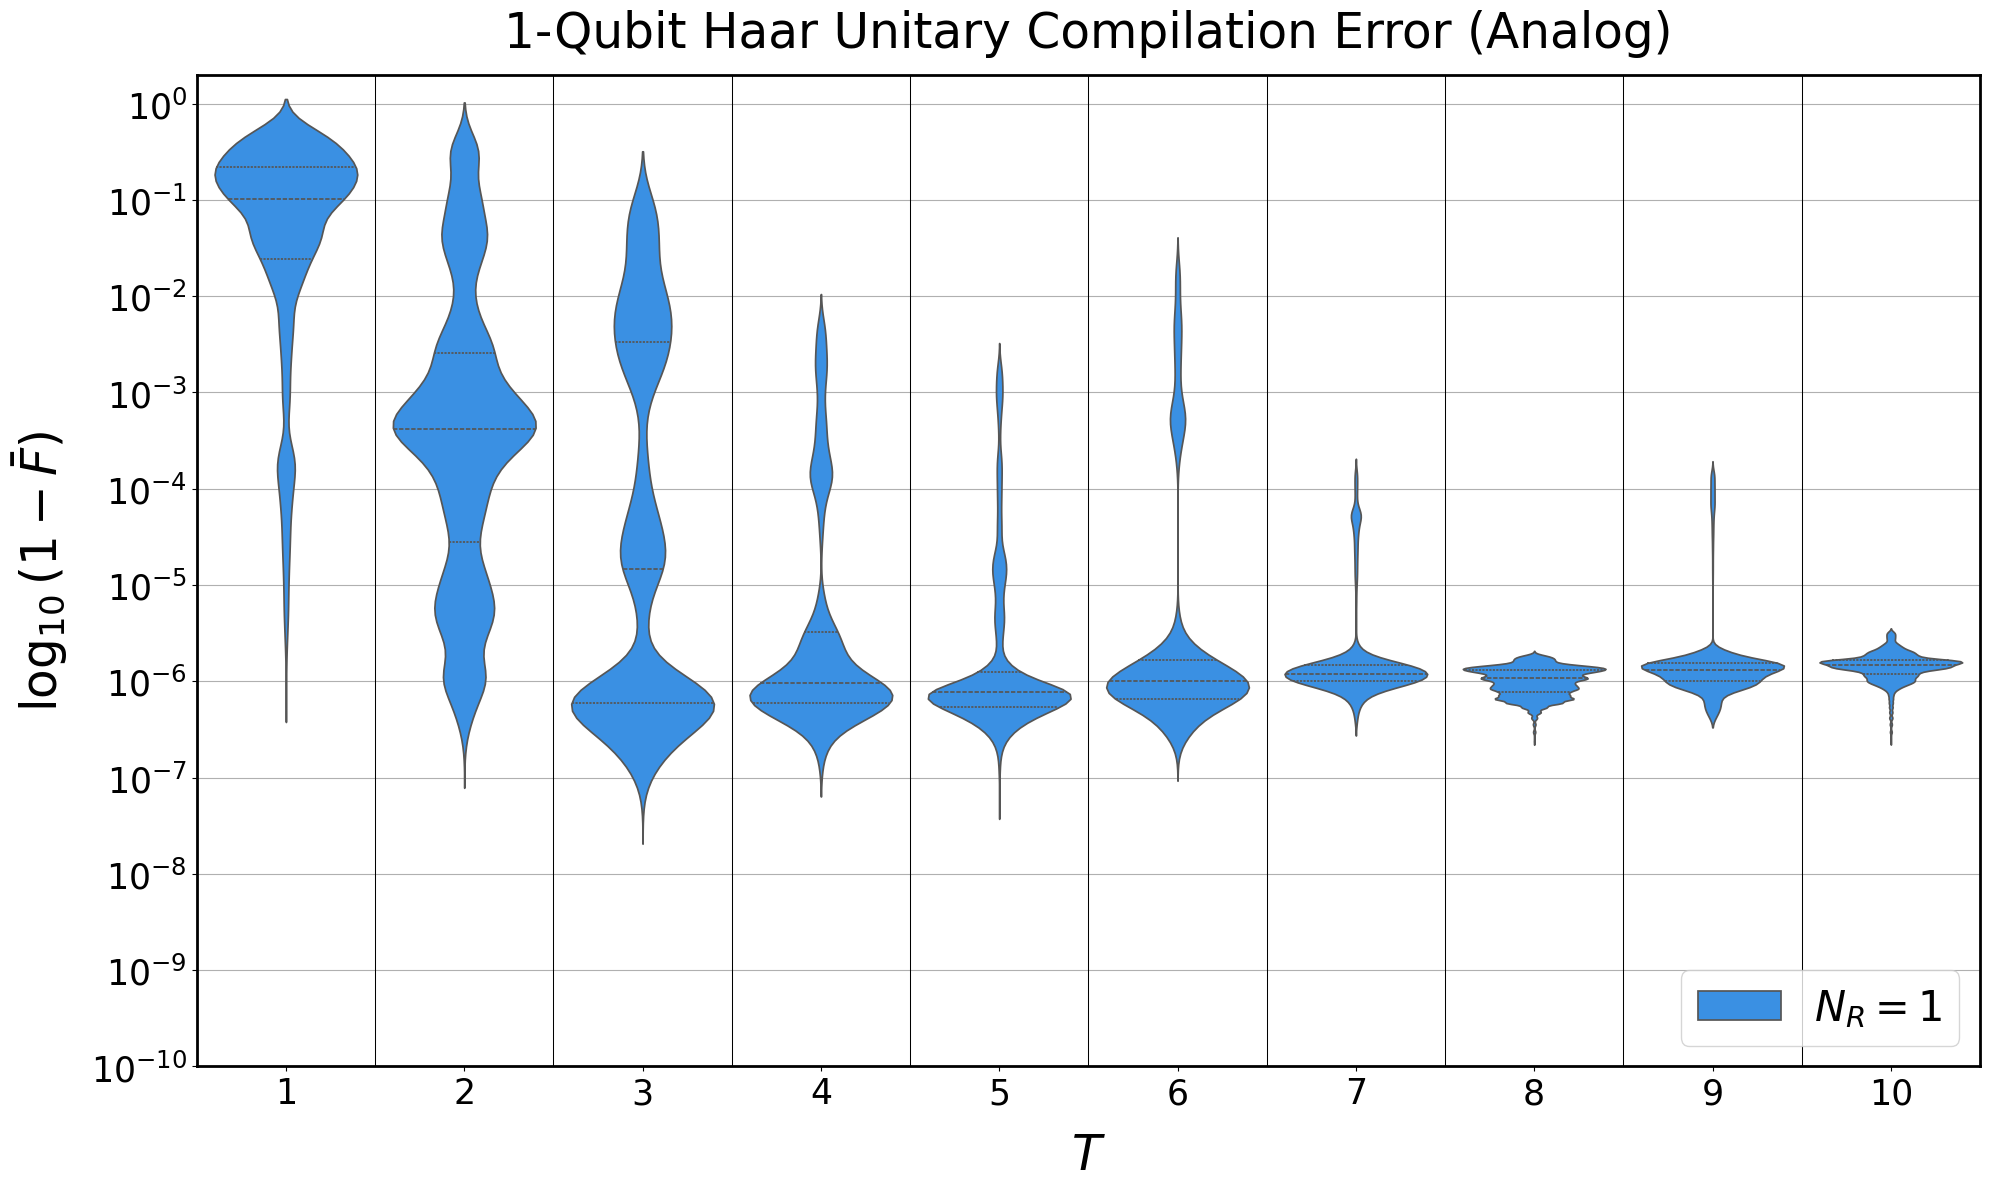

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_29476/2919323892.py:73: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df,


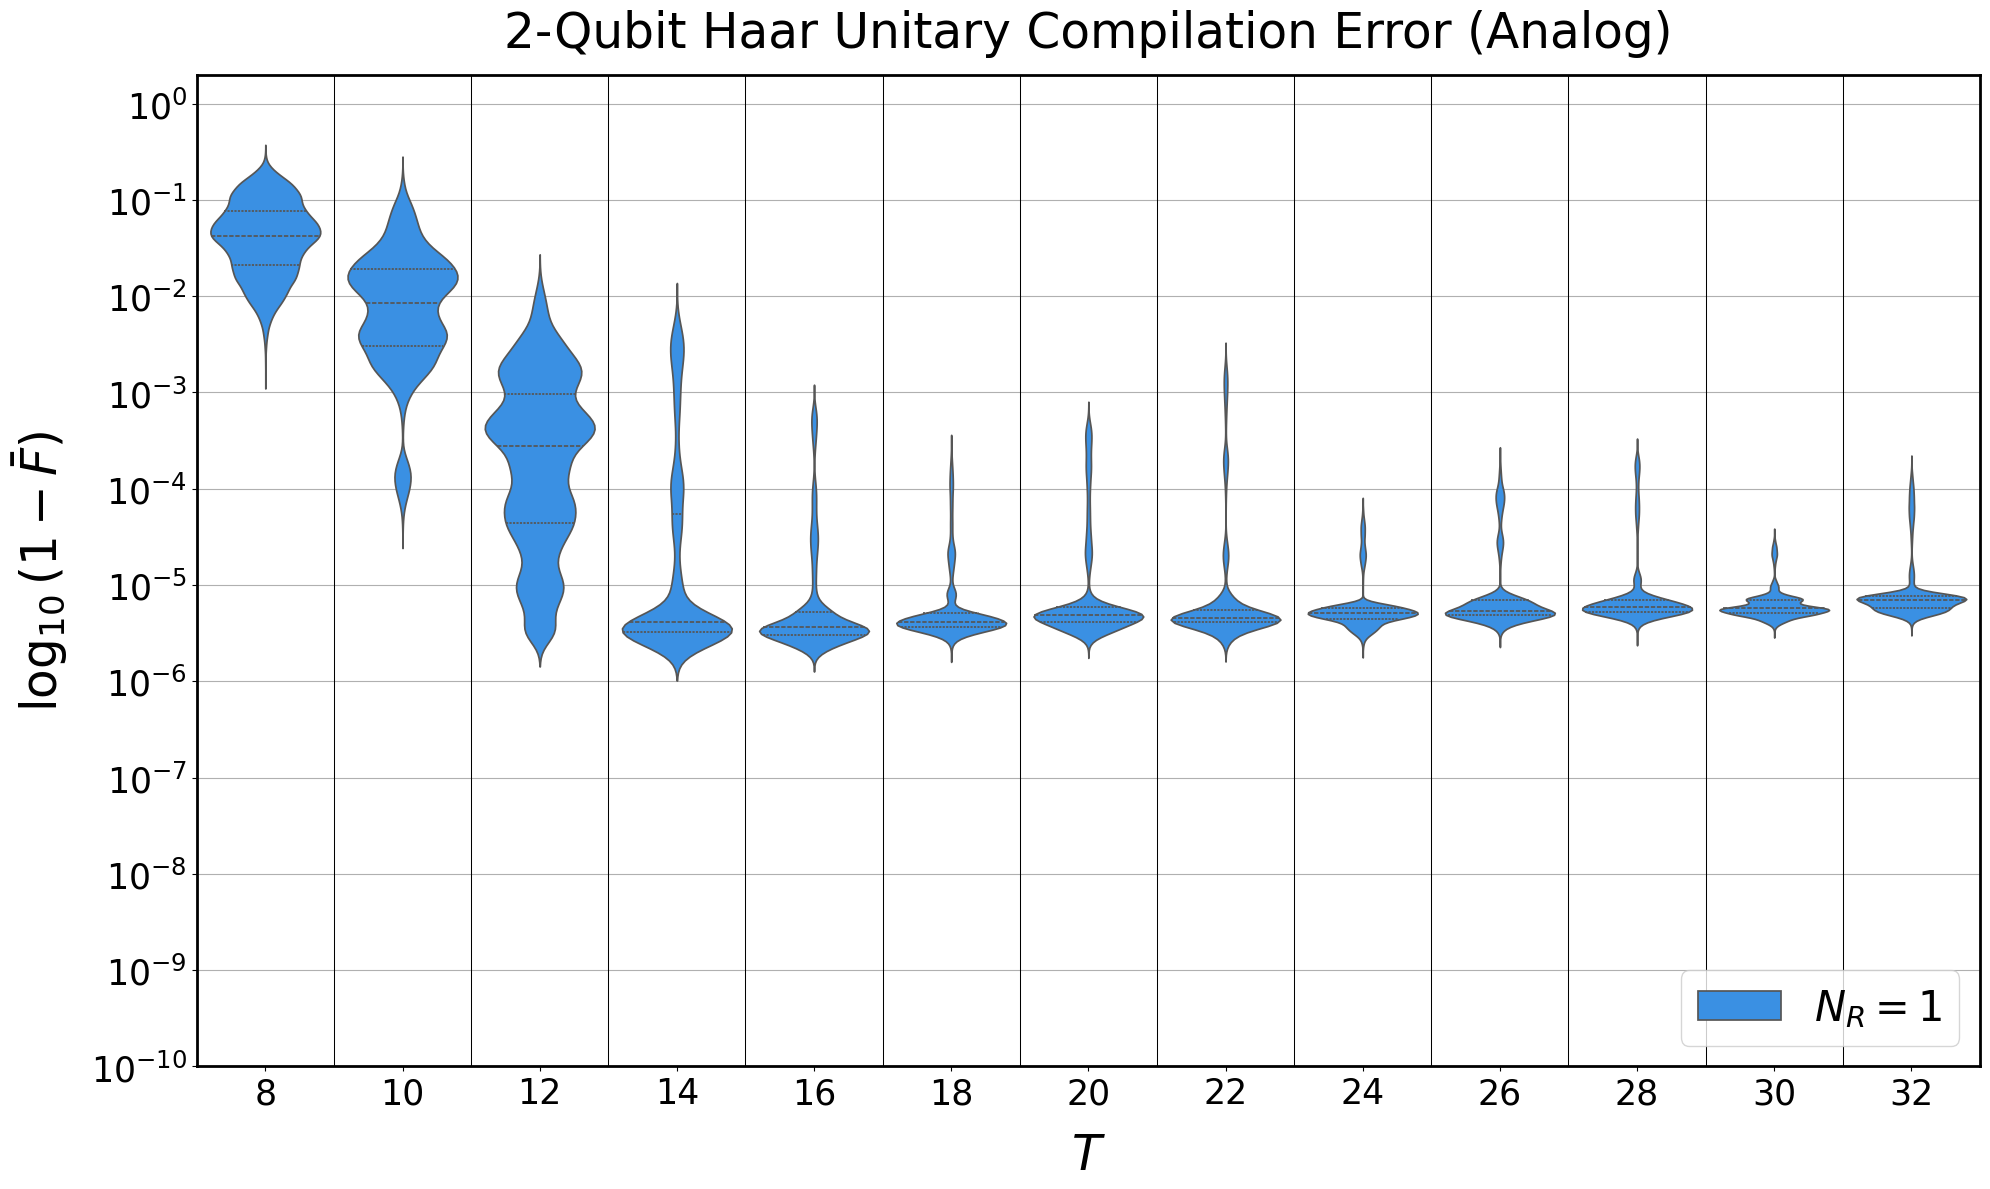

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_29476/2919323892.py:73: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df,


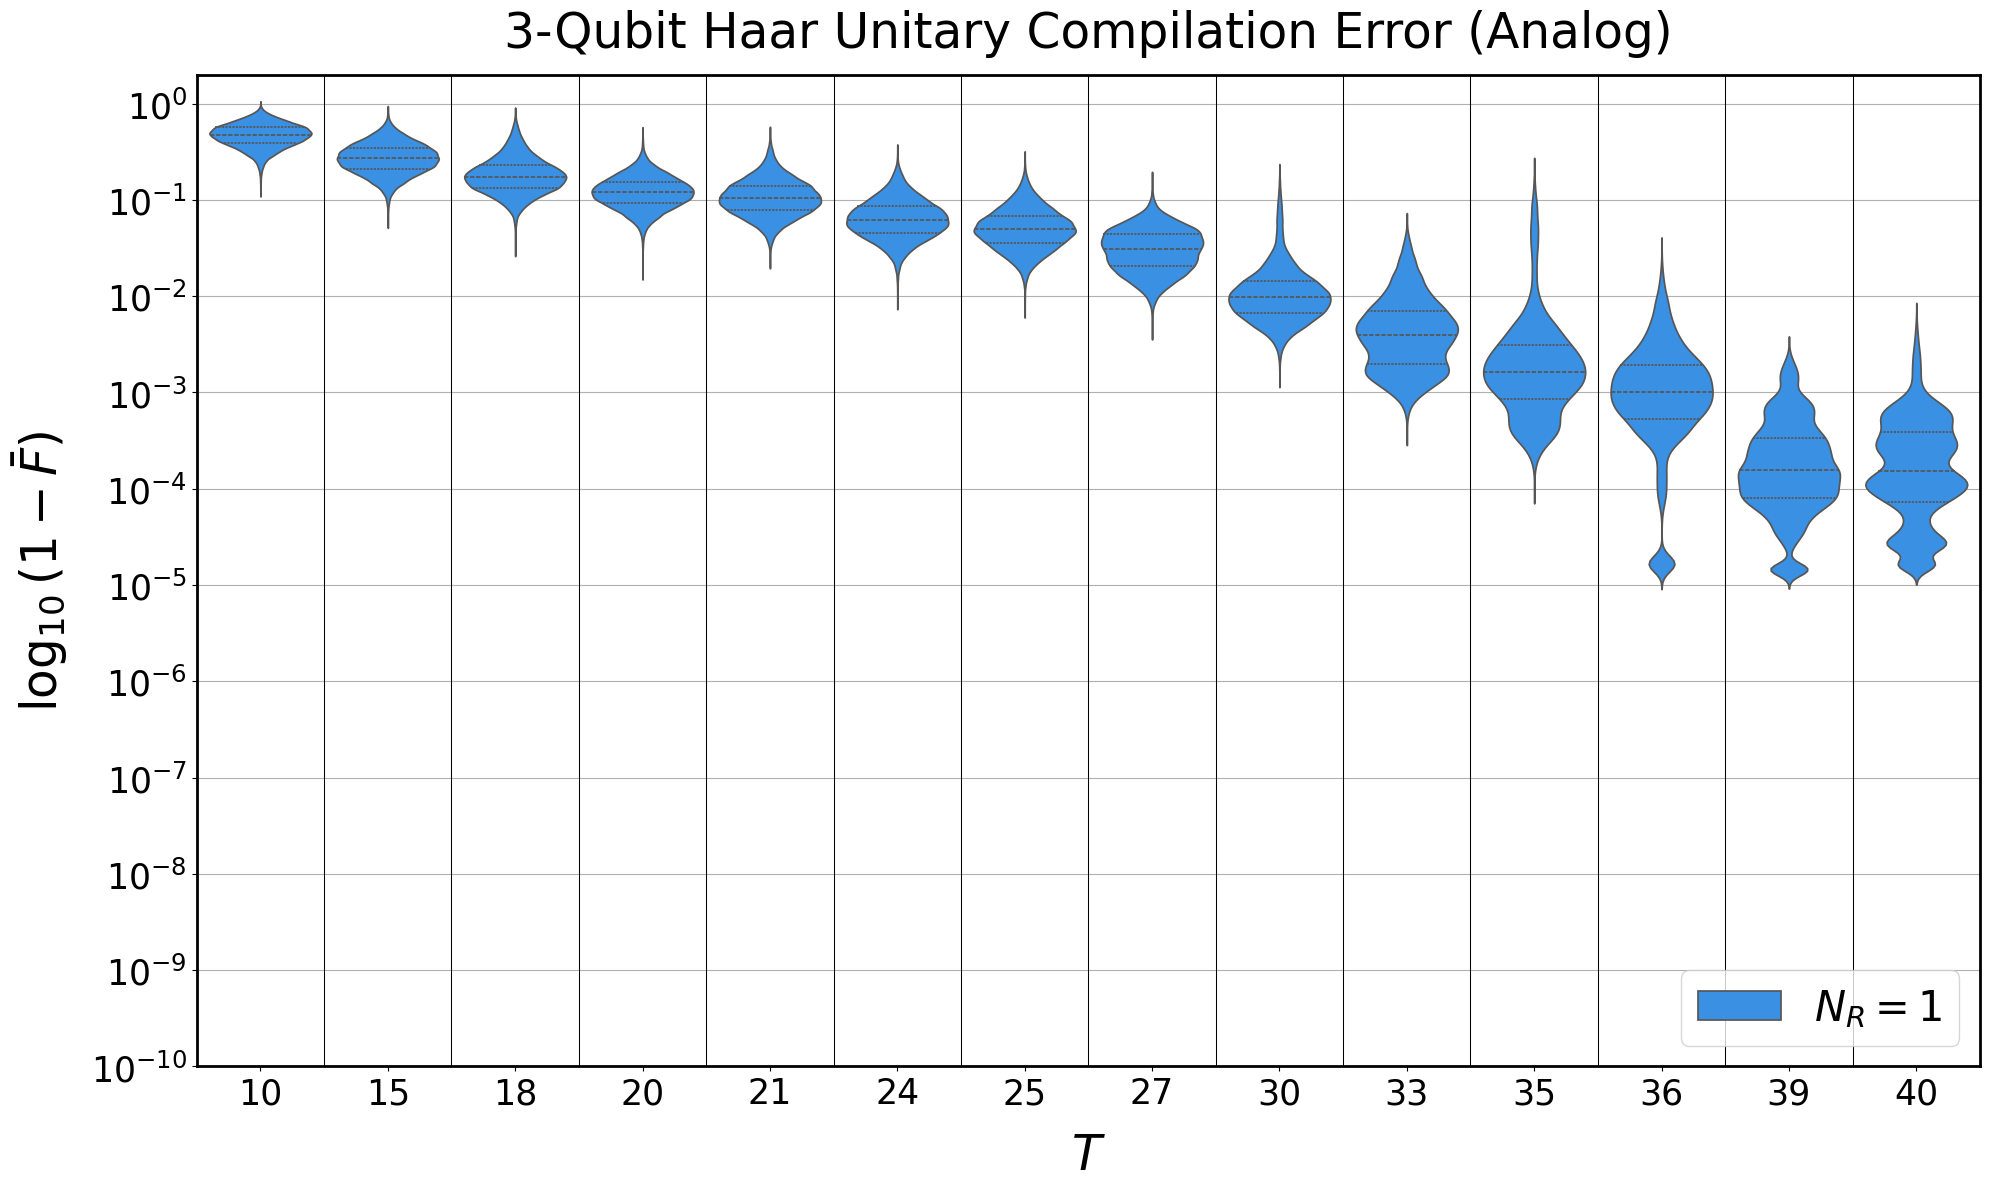

In [35]:
# Initialize variables to store global min and max y-values
global_min_y = float('inf')
global_max_y = float('-inf')

custom_palette = ['dodgerblue', 'gold', 'violet'] 
# First pass to determine the global min and max y-values across all plots
for N_ctrl in N_ctrls:
    if N_ctrl == 2:
        trots = [1, 4, 6, 8, 10, 12, 14, 16,18, 20,24]
    elif N_ctrl == 1:
        trots = [1, 2, 3, 4, 5,6,7,8]
    print(trots)
    trots = np.arange(1,50,1)
    # Filter the DataFrame for specific N_C (control qubits)
    data_df = all_data_df[all_data_df['N_C'] == N_ctrl]
    data_df = data_df[data_df['Trotter_Step'].isin(trots)]

    # Explode test results into separate rows to plot each error individually
    test_results_df = data_df.explode('Error Test Results')

    # Find the common Trotter steps across all reservoir counts
    grouped_trotter_steps = test_results_df.groupby(['Trotter_Step', 'Reservoir Count']).size().unstack(fill_value=0)
    valid_trotter_steps = grouped_trotter_steps[(grouped_trotter_steps > 0).all(axis=1)].index

    # Filter the DataFrame to only include those Trotter steps
    test_results_df = test_results_df[test_results_df['Trotter_Step'].isin(valid_trotter_steps)]

    # Get min and max y-values for the current N_ctrl
    current_min_y = test_results_df['Error Test Results'].min()
    current_max_y = test_results_df['Error Test Results'].max()

    # Update global min and max y-values
    global_min_y = min(global_min_y, current_min_y)
    global_max_y = max(global_max_y, current_max_y)
margin_factor = 0.1
global_min_y -= margin_factor * abs(global_min_y)
global_max_y = 0.3
print(f"global_min_y: {global_min_y}")
# Now that we have the global y-limits, we can proceed to plotting
for N_ctrl in N_ctrls:
    # if N_ctrl == 2:
    #     trots = [1, 6, 8, 10, 12, 14,16, 20,24]
    # elif N_ctrl == 1:
    #     trots = [1, 2, 3, 4, 5,6,7,8]
    trots = np.arange(1,50,1)

    # Filter the DataFrame for specific N_C (control qubits)
    # data_df = all_data_df[all_data_df['N_C'] == N_ctrl]
    # data_df = data_df[data_df['Trotter_Step'].isin(trots)]
    # Filter the DataFrame for specific N_C (control qubits) and Trotter steps
    data_df = all_data_df[all_data_df['Reservoir Count'] < 4]
    data_df = data_df[(data_df['N_C'] == N_ctrl) & (data_df['Trotter_Step'].isin(trots))]


    # Explode test results into separate rows to plot each error individually
    test_results_df = data_df.explode('Error Test Results')

    # Find the common Trotter steps across all reservoir counts
    grouped_trotter_steps = test_results_df.groupby(['Trotter_Step', 'Reservoir Count']).size().unstack(fill_value=0)
    valid_trotter_steps = grouped_trotter_steps[(grouped_trotter_steps > 0).all(axis=1)].index

    # Filter the DataFrame to only include those Trotter steps
    test_results_df = test_results_df[test_results_df['Trotter_Step'].isin(valid_trotter_steps)]

    # Plot for each control qubit
    fig, axs = plt.subplots(1, figsize=(20, 12))

    # Set the linewidth of the outside border (spines)
    for spine in axs.spines.values():
        spine.set_linewidth(2)  # Set linewidth to 2 pixels

    # Violin plot for Error Test Results (log10(1 - Test Results))
    sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df, 
                   ax=axs, palette=custom_palette, density_norm='width', inner='quartile', saturation=0.75)

    # Set titles and labels with padding
    # axs.set_title(f"$\\log_{{10}}(1 - \\bar{{F}}) \\, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$", fontsize=30, pad=20)
    axs.set_title(f"{N_ctrl}-Qubit Haar Unitary Compilation Error (Analog)", fontsize=35, pad=20)

    axs.set_xlabel('$T$', fontsize=35, labelpad=15)  # X-axis label with padding
    axs.set_ylabel(r'$\log_{10}\left(1 - \bar{F}\right)$', fontsize=35, labelpad=15)  # Y-axis label with padding


    # Add grid lines
    axs.yaxis.grid(True)
    axs.xaxis.grid(False)
    axs.set_axisbelow(True)

    # Customize the legend
    handles, labels = axs.get_legend_handles_labels()
    axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower right', fontsize=30, ncol=len(labels))

    # Set the global Y-limits
    axs.set_ylim(global_min_y, global_max_y)

    # Set Y-ticks and labels
    y_ticks = axs.get_yticks()
    whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
    min_tick = min(whole_y_ticks)
    max_tick = max(whole_y_ticks)
    whole_y_ticks = np.arange(min_tick-2, max_tick + 1, 1)
    axs.set_yticks(whole_y_ticks)
    axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

    # Set tick parameters
    axs.tick_params(axis='y', labelsize=25)
    axs.tick_params(axis='x', labelsize=25)

    # Add vertical lines to separate groups
    unique_trotter_steps = test_results_df['Trotter_Step'].unique()
    positions = range(1, len(unique_trotter_steps), 1)
    for pos in positions:
        axs.axvline(x=pos - 0.5, color='black', linewidth=0.75)

    # Show the plot for the current N_ctrl
    plt.tight_layout()
    plt.show()

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_29476/2431200628.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_matrix_avg = pivot_avg.applymap("{:.4f}".format)


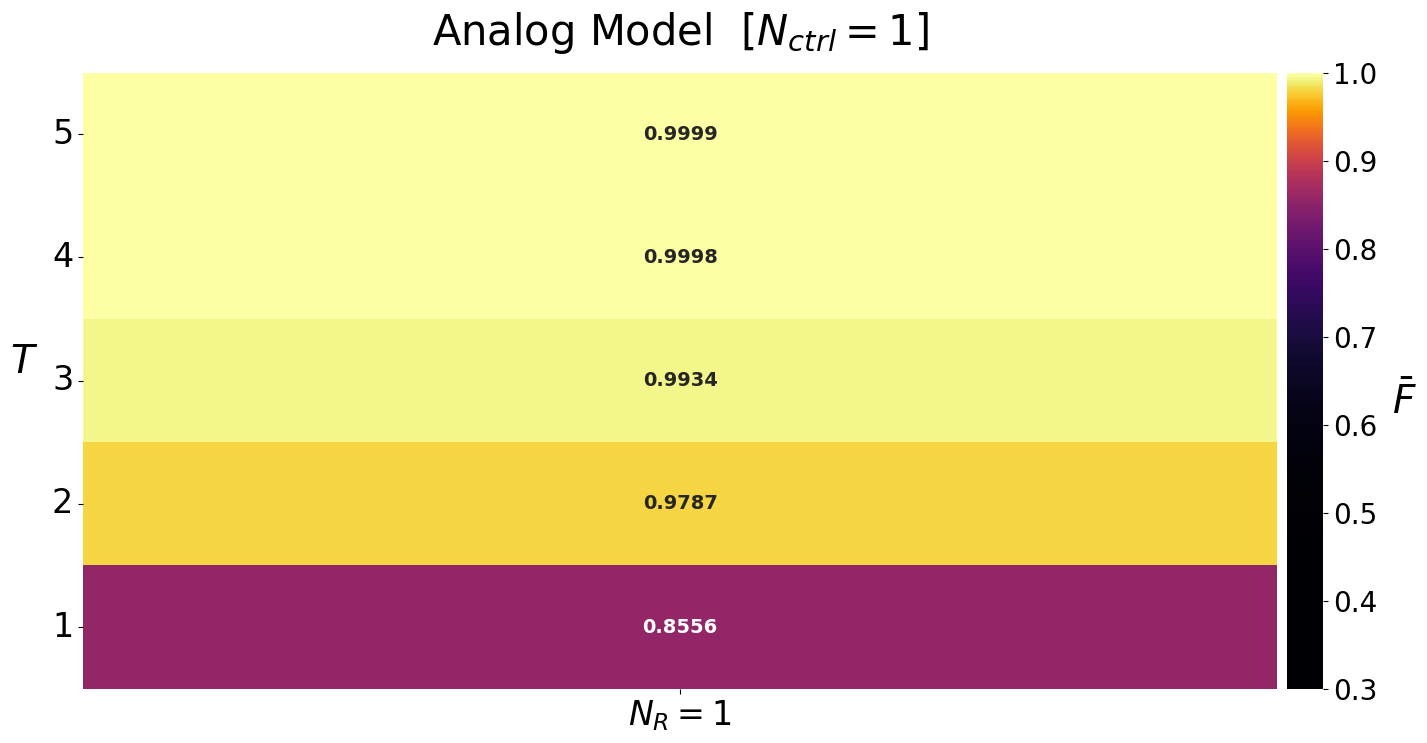

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_29476/2431200628.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_matrix_avg = pivot_avg.applymap("{:.4f}".format)


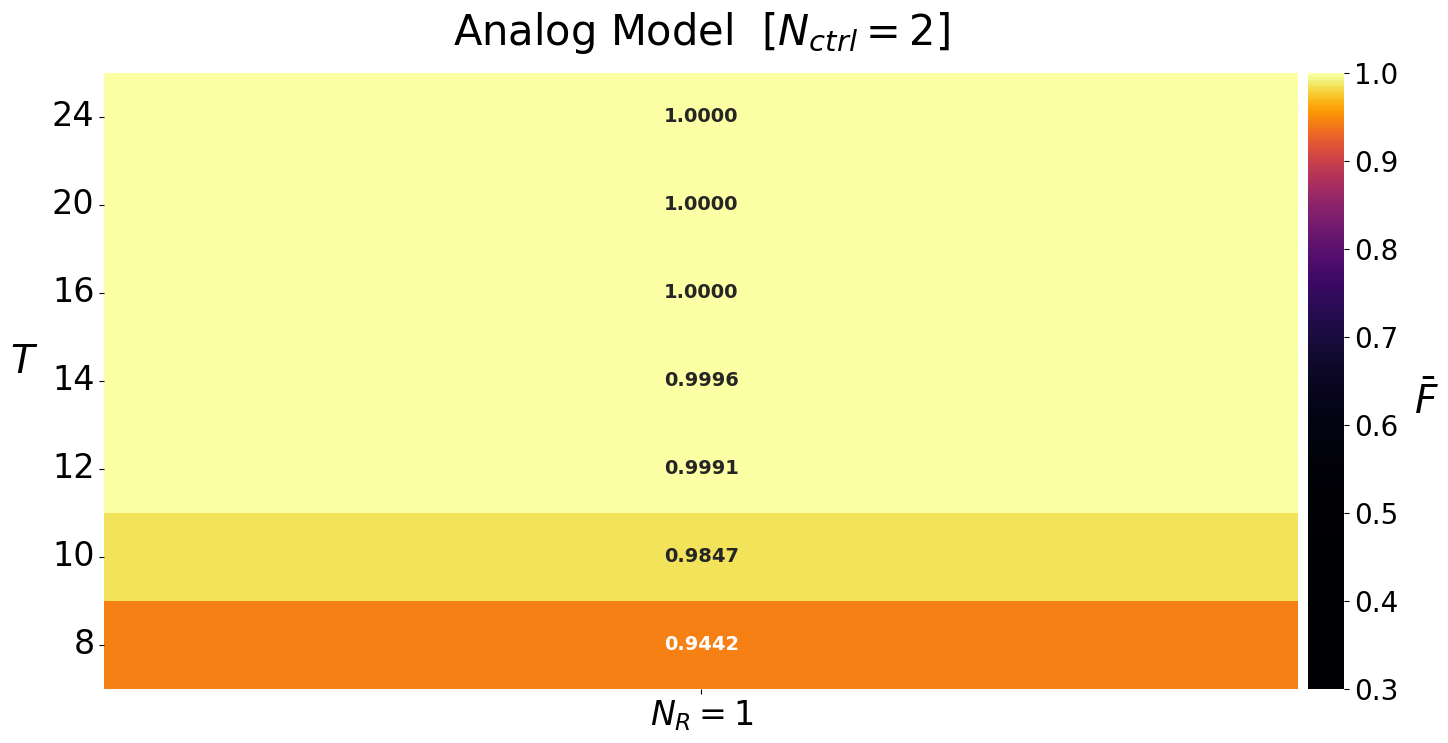

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_29476/2431200628.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_matrix_avg = pivot_avg.applymap("{:.4f}".format)


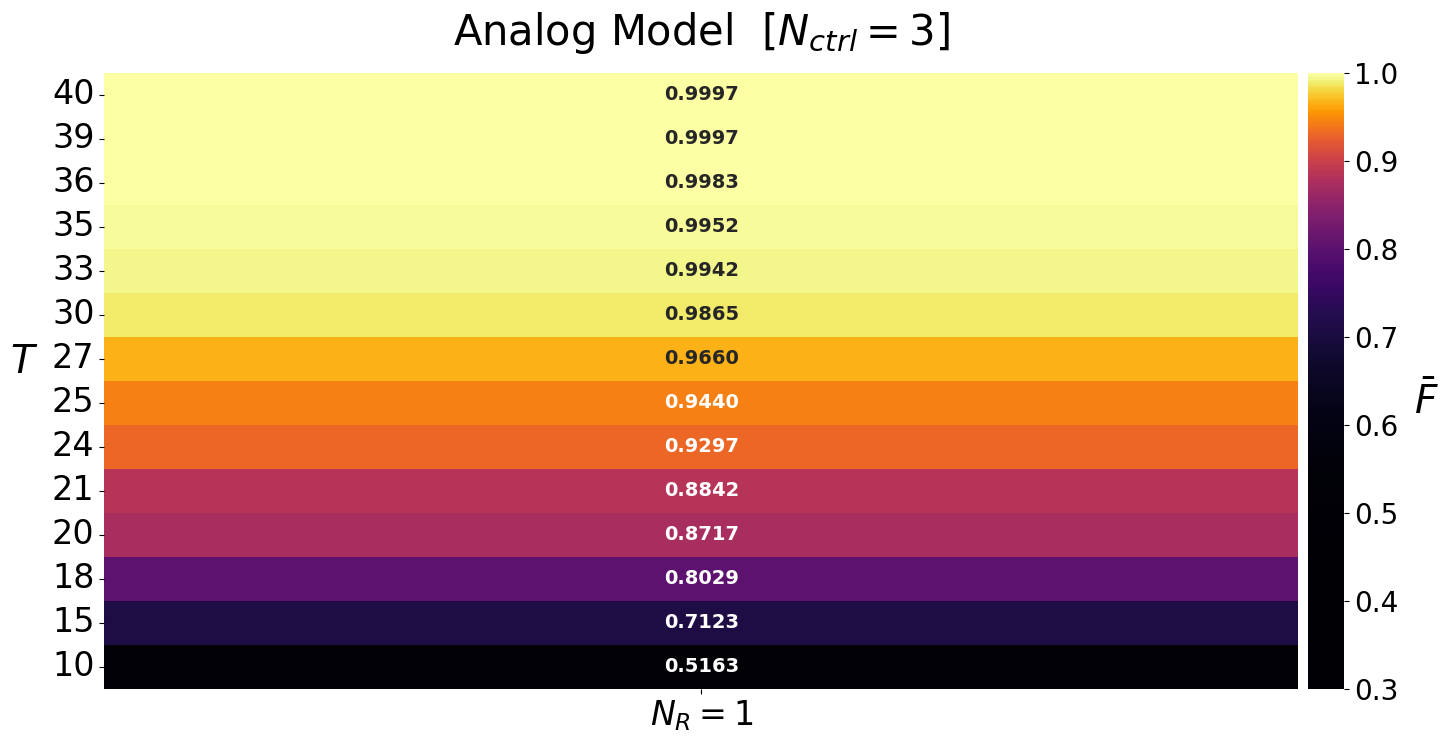

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
width = 0.6# Width of the bars in the bar plot
n_colors = 256  # Number of colors in the colormap for visual differentiation
n_groups = len(reservoir_counts)  # Number of groups, now based on bath counts
base_colormap = plt.cm.inferno  # Base colormap for visual appeal

for N_ctrl in N_ctrls:
    if N_ctrl == 3:
        trots = np.arange(1,50,1)
    elif N_ctrl == 2:
        trots = [1, 4, 6, 8, 10, 12, 14, 16, 20, 24]
    elif N_ctrl == 1:
        trots = [1, 2, 3, 4, 5]

    # Filter data for the current N_ctrl and specific Trotter steps
    data_df = all_data_df[(all_data_df['N_C'] == N_ctrl) & (all_data_df['Trotter_Step'].isin(trots))]

    # Compute average fidelity and standard deviation for each Trotter step and Reservoir Count
    averaged_data = data_df.groupby(['Trotter_Step', 'Reservoir Count']).agg(
        Average_Fidelity=('Avg_Fidelity', 'mean'),
        Std_Dev=('Avg_Fidelity', 'std')
    ).reset_index()

    # Pivot the data for the heatmap
    pivot_avg = averaged_data.pivot(index="Trotter_Step", columns="Reservoir Count", values="Average_Fidelity")
    pivot_std = averaged_data.pivot(index="Trotter_Step", columns="Reservoir Count", values="Std_Dev")

    # Create annotation matrix for Average Fidelity heatmap
    annotation_matrix_avg = pivot_avg.applymap("{:.4f}".format)

    # Define the custom colormap
    values = np.linspace(0, 1, n_colors)**4
    colors = base_colormap(values)
    custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_inferno', colors, N=n_colors)

    # Create the figure and axis for the heatmap
    fig, axs = plt.subplots(1, figsize=(16, 8))
    heatmap_ax_avg = axs

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(heatmap_ax_avg)
    cax = divider.append_axes("right", size="3%", pad=0.1)

    # Plot the average fidelity heatmap with annotations
    sns.heatmap(
        pivot_avg, annot=annotation_matrix_avg, fmt="s", cmap=custom_colormap, 
        ax=heatmap_ax_avg, cbar_ax=cax, cbar_kws={'label': 'Fidelity'}, 
        annot_kws={"weight": "bold", "size": 14}, vmin=0.3, vmax=1.00
    )

    # Adjust the color bar
    cbar = heatmap_ax_avg.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(r'$\bar{F}$', rotation=0, labelpad=20, fontsize=28, weight='bold')

    # Customize the plot appearance
    heatmap_ax_avg.invert_yaxis()
    heatmap_ax_avg.set_title(f'Analog Model  [$N_{{ctrl}} = {N_ctrl}$]', fontsize=30, pad=20)
    heatmap_ax_avg.set_ylabel("$T$", labelpad=20, fontsize=28, rotation=0)
    heatmap_ax_avg.set_xticklabels([f'$N_R = {int(rc)}$' for rc in pivot_avg.columns], fontweight='bold', fontsize=24, rotation=0)
    heatmap_ax_avg.set_yticklabels([int(ts) for ts in pivot_avg.index], fontsize=24, rotation=0)
    heatmap_ax_avg.set_xlabel('')

    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ['dodgerblue', 'gold', 'violet'] 
# Make sure to clear previous figures
plt.close('all')

N_ctrls = [1,2]  # Assuming N_ctrls is a list of control qubits
# all_data_df = all_data_df[all_data_df['Trotter_Step'] < 6]
# all_data_df = all_data_df[all_data_df['Reservoir Count'] < 4]
for N_ctrl in N_ctrls:
    if N_ctrl == 2:
        trots = [1,4,6,8,10,12,14,16,18,20,22,24,26,28]
        # trots = [1,2,3,4,5,6,7,8,10,12,14]
    elif N_ctrl == 1:

        trots = [1, 2, 3, 4, 5,6,7,8]


    # Filter the DataFrame for specific N_C (control qubits)
    data_df = all_data_df[all_data_df['N_C'] == N_ctrl]
    data_df = data_df[data_df['Trotter_Step'].isin(trots)]
    
    # Explode test results into separate rows to plot each error individually
    test_results_df = data_df.explode('Error Test Results')

    # Find the common Trotter steps across all reservoir counts
    grouped_trotter_steps = test_results_df.groupby(['Trotter_Step', 'Reservoir Count']).size().unstack(fill_value=0)
    valid_trotter_steps = grouped_trotter_steps[(grouped_trotter_steps > 0).all(axis=1)].index

    # Filter the DataFrame to only include those Trotter steps
    test_results_df = test_results_df[test_results_df['Trotter_Step'].isin(valid_trotter_steps)]

    # Plot for each control qubit
    fig, axs = plt.subplots(1, figsize=(20, 12))

    # Set the linewidth of the outside border (spines)
    for spine in axs.spines.values():
        spine.set_linewidth(2)  # Set linewidth to 2 pixels

    # Violin plot for Error Test Results (log10(1 - Test Results))
    # sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df, 
    #                ax=axs, palette=custom_palette,  inner='quartile', saturation=0.75)
    sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df, 
                   ax=axs, palette=custom_palette, density_norm='width', inner='quartile',saturation=0.75)

    # Set titles and labels with padding
    axs.set_title(f"$\\log_{{10}}(1 - \\bar{{F}}) \\, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$", fontsize=30, pad=20)
    axs.set_xlabel('$L$ (layers)', fontsize=35, labelpad=15)  # X-axis label with padding
    axs.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=35, labelpad=15)  # Y-axis label with padding

    # Add grid lines
    axs.yaxis.grid(True)
    axs.xaxis.grid(False)
    axs.set_axisbelow(True)

    # Customize the legend
    handles, labels = axs.get_legend_handles_labels()
    axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=30)

    # Set Y-ticks and labels
    y_ticks = axs.get_yticks()
    whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
    min_tick = min(whole_y_ticks)
    max_tick = max(whole_y_ticks)
    whole_y_ticks = np.arange(min_tick,max_tick+1,1)
    axs.set_yticks(whole_y_ticks)
    axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

    # Set tick parameters
    axs.tick_params(axis='y', labelsize=25) 
    axs.tick_params(axis='x', labelsize=25) 

    # Add vertical lines to separate groups
    unique_trotter_steps = test_results_df['Trotter_Step'].unique()
    positions = range(1, len(unique_trotter_steps), 1)
    for pos in positions:
        axs.axvline(x=pos - 0.5, color='black', linewidth=0.75)

    # Show the plot for the current N_ctrl
    plt.tight_layout()
    plt.show()



In [ ]:
data_df = all_data_df[all_data_df['N_C'] == 1]
# filt_df = data_df[data_df['Reservoir Count'] == 2]
filt_df = data_df[(data_df['Trotter_Step'] == 2) & (data_df['Reservoir Count'] == 2)]

filt_df.head()

In [ ]:
# Group by 'Gate' and calculate the average fidelity for each gate
avg_fidelity_per_gate = filt_df.groupby('Gate')['Avg_Fidelity'].mean()

# Print the result
for gate, avg_fidelity in avg_fidelity_per_gate.items():
    print(f"Gate: {gate}, Average Fidelity: {avg_fidelity}")

In [ ]:

custom_palette = ['dodgerblue', 'gold', 'violet'] 
# Make sure to clear previous figures
plt.close('all')

trots = [1,2,3,4,5]
N_ctrl = 1
data_df = all_data_df[all_data_df['N_C'] == N_ctrl]
# Filter the DataFrame for specific Trotter_Steps
data_filtered = data_df[data_df['Trotter_Step'].isin(trots)]
data_filtered


In [ ]:

### First Violin Plot for Average Error ###

fig, axs = plt.subplots(1, figsize=(20, 12))

# Set the linewidth of the outside border (spines)
for spine in axs.spines.values():
    spine.set_linewidth(2)  # Set linewidth to 2 pixels

# Violin Plot for Average Error (log10(1 - avg_fidelity))
sns.violinplot(x='Trotter_Step', y='Avg Error', hue='Reservoir Count', data=data_filtered, 
               ax=axs, palette=custom_palette, scale='width', inner="point")

# Set titles and labels with padding
axs.set_title(f'$\log_{{10}}(1 - \\bar{{F}}) \, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$', fontsize=30, pad=20)
axs.set_xlabel('$d$', fontsize=35, labelpad=15)  # X-axis label with padding
axs.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=35, labelpad=15)  # Y-axis label with padding

# Add grid lines
axs.yaxis.grid(True)
axs.xaxis.grid(False)
axs.set_axisbelow(True)

# Customize the legend
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=30)

# Set Y-ticks and labels
y_ticks = axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
axs.set_yticks(whole_y_ticks)
axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Set tick parameters
axs.tick_params(axis='y', labelsize=20) 
axs.tick_params(axis='x', labelsize=20) 

# Add vertical lines to separate groups
unique_trotter_steps = data_filtered['Trotter_Step'].unique()
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    axs.axvline(x=pos - 0.5, color='black', linewidth=0.75)

# Show the plot
plt.tight_layout()
plt.show()

### Second Violin Plot for Error Test Results ###

# Explode test results into separate rows to plot each error individually
test_results_df = data_df.explode('Error Test Results')
test_results_df = test_results_df[test_results_df['Trotter_Step'].isin(trots)]

fig, axs = plt.subplots(1, figsize=(20, 12))

# Set the linewidth of the outside border (spines)
for spine in axs.spines.values():
    spine.set_linewidth(2)  # Set linewidth to 2 pixels

# Violin plot for Error Test Results (log10(1 - Test Results))
sns.violinplot(x='Trotter_Step', y='Error Test Results', hue='Reservoir Count', data=test_results_df, 
               ax=axs, palette=custom_palette, scale='width', inner='quartile', saturation=0.75)

# Set titles and labels with padding
axs.set_title(f'$\log_{{10}}(1 - \\bar{{F}}) \, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$', fontsize=30, pad=20)
axs.set_xlabel('$d$', fontsize=35, labelpad=15)  # X-axis label with padding
axs.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=35, labelpad=15)  # Y-axis label with padding

# Add grid lines
axs.yaxis.grid(True)
axs.xaxis.grid(False)
axs.set_axisbelow(True)

# Customize the legend
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=30)

# Set Y-ticks and labels
y_ticks = axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
axs.set_yticks(whole_y_ticks)
axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Set tick parameters
axs.tick_params(axis='y', labelsize=25) 
axs.tick_params(axis='x', labelsize=25) 

# Add vertical lines to separate groups
unique_trotter_steps = test_results_df['Trotter_Step'].unique()
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    axs.axvline(x=pos - 0.5, color='black',linewidth=0.75)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Create subplots for visualizing the data
fig, axs = plt.subplots(2, figsize=(14, 18))


# data_average_error = data_df[data_df[]]
# Box plot for fidelity
sns.boxplot(x='Trotter_Step', y='Avg_Fidelity', hue='Reservoir Count', data=data_df, ax=axs[0],
            palette='YlOrRd', medianprops={"color": "r", "linewidth": 1}, whis=(5, 95))

# Customize the plot
axs[0].set_title(f'Analog: $\log_{{10}}(1 - F)$', fontsize=25)
axs[0].set_xlabel('$d$ (depth)', fontsize=20)
axs[0].set_ylabel(r'$\log(\text{Infidelity})$', fontsize=20)



sns.violinplot(x='Trotter_Step', y='Log_Infidelity', hue='Reservoir Count', data=data_df, ax=axs[1],
               palette=custom_palette, scale='width', inner="point", bw_adjust=.4)

# Customize violin plot
axs[1].set_title(f'Analog: $\log_{{10}}(1 - F)$', fontsize=25)
axs[1].set_xlabel('$d$ (depth)', fontsize=20)
axs[1].set_ylabel(r'$\log(\text{Infidelity})$', fontsize=20)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:

fidelity_data = {}
if N_ctrl == 1:

    trots = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
elif N_ctrl == 2:
    trots = [1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28]
    # trots = [12]
else:
    trots = np.arange(3,54,1)

infidelity_data = {}
infidelity_data_averaged = {}
for gate, gate_data in data_i.items():
    for reservoir_count, trotter_data in gate_data.items():
        if reservoir_count not in reservoir_counts:
            continue
        for trotter_step, results in trotter_data.items():
            if trotter_step not in trots:
                continue
            fidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
            infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                
            average_fidelity = results['fidelity']
            average_infidelity = 1.000 - average_fidelity
            test_results = results['test_results']
            # if trotter_step == 8 and reservoir_count == 2:
            #     print(gate, average_fidelity)
            if average_fidelity is not None:
                fidelity_data[trotter_step][reservoir_count].append(average_fidelity)
            infidelity_res = 1.000 - np.array(test_results)
            # Store infidelities directly
            infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, []).extend(infidelity_res)           
            infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)
     
# Create subplots for each plot type
fig, axs = plt.subplots(2, figsize=(14, 18)) 

# Prepare data for bar plot
averaged_data = {}
standard_deviation_data = {}
for trotter_step, res_data in fidelity_data.items():
    for reservoir_count, fidelities in res_data.items():
        if fidelities:
            all_fidelities = np.array(fidelities)
            averaged_data.setdefault(trotter_step, {})[reservoir_count] = np.mean(all_fidelities)
            standard_deviation_data.setdefault(trotter_step, {})[reservoir_count] = np.std(all_fidelities)
  
# Plot bar graph
all_trotter_steps = sorted(averaged_data.keys())
positions = range(len(all_trotter_steps))
offset = -(width * n_groups / 2)
bar_positions = {res_count: [p + offset + idx * width for p in positions] for idx, res_count in enumerate(reservoir_counts)}
y_tickie = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#(reservoir_counts)
# Bar plot
# Prepare data for box plot with parameters on x-axis


box_plot_data = []
for trotter_step, res_data in fidelity_data.items():
    for reservoir_count, fidelities in res_data.items():
        # if reservoir_count != 1 and reservoir_count != 2:
        #     continue
        num_params = trotter_step * N_ctrl * reservoir_count + trotter_step + 3
        for fidelity in fidelities:
            box_plot_data.append((num_params,trotter_step, reservoir_count, float(fidelity)))
df_box_params = pd.DataFrame(box_plot_data, columns=['Number of Parameters', 'time steps','Reservoir Count', 'Fidelity'])

# Plot box plot with parameters on x-axis
box_ax_params = axs[0]
sns.boxplot(x='time steps', y='Fidelity', hue='Reservoir Count', data=df_box_params, ax=box_ax_params,
            palette='YlOrRd', medianprops={"color": "r", "linewidth": 1}, whis=(5, 95))
for patch in box_ax_params.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
box_ax_params.yaxis.grid(True)
box_ax_params.xaxis.grid(False)
box_ax_params.set_axisbelow(True)
box_ax_params.set_title('Fidelity Distribution (Digital) - Number of Parameters')
box_ax_params.set_xlabel('Number of Parameters')
box_ax_params.set_ylabel('Fidelity')
box_ax_params.legend(title='$N_{R}$')

box_plot_data = []
for trotter_step, res_data in fidelity_data.items():
    for reservoir_count, fidelities in res_data.items():
        for fidelity in fidelities:
            #print(fidelity)
            box_plot_data.append((trotter_step, reservoir_count, float(fidelity)))


plt.subplots_adjust(hspace=0.5)
   
violin_plot_data = []
for trotter_step, res_data in infidelity_data_averaged.items():
    for reservoir_count, infidelities in res_data.items():
        for infidelity in infidelities:
            log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
            violin_plot_data.append((trotter_step, reservoir_count, log_infidelity))
df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Reservoir Count', 'Log(Infidelity)'])
violin_axs = axs[1]
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Reservoir Count', data=df_violin, ax=axs[1],
               palette=custom_palette, scale='width', inner="point", bw_adjust=.4)

# Customize the plot
violin_axs.yaxis.grid(True)
violin_axs.xaxis.grid(False)
violin_axs.set_axisbelow(True)
violin_axs.set_title(f'Analog: $\log_{{10}}(1 - F)$', fontsize=25)
violin_axs.set_xlabel('$d$ (depth)', fontsize=20)
violin_axs.set_ylabel(r'$\log(\text{Infidelity})$', fontsize=20)

# Customizing the legend
handles, labels = violin_axs.get_legend_handles_labels()
print(handles,labels)
violin_axs.legend(handles, [f'$N_C = {N_ctrl}$, $N_R = {label}$' for label in labels], title_fontsize=16, loc='lower left', fontsize=18)

# Adjust y-tick labels
y_ticks = violin_axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
violin_axs.set_yticks(whole_y_ticks)
violin_axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Adjust tick parameters
violin_axs.tick_params(axis='y', labelsize=16)
violin_axs.tick_params(axis='x', labelsize=16)

# Add vertical lines to separate groups
unique_trotter_steps = df_violin['Trotter_Step'].unique()
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    violin_axs.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)
#violin_axs.set_ylim(-4.3, 0)
# Show the plot
plt.show()

In [ ]:
N_ctrl = 1
data_i = cached_data_analog[N_ctrl]
custom_palette = ['dodgerblue', 'gold', 'violet'] 
reservoir_counts = [1]
width = 0.15  # the width of the bars
n_colors = 256  # number of colors in the colormap
n_groups = len(reservoir_counts)  # number of groups in the bar plot
base_colormap = plt.cm.plasma  # base colormap to use

# Define the colormap
values = np.linspace(0, 1, n_colors)**4  # Raise to a power to skew the distribution
colors = base_colormap(values)
custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_plasma', colors, N=n_colors)

# Initialize global min/max fidelity
global_min_fidelity = float('inf')
global_max_fidelity = 0

# Calculate global min and max fidelity
for gate_data in data_i.values():
    for trotter_data in gate_data.values():
        for results in trotter_data.values():
            # print(len(results),results)
            fidelity = np.mean(results[0]['test_results'])
            
            if fidelity is not None:
                global_min_fidelity = min(global_min_fidelity, fidelity)
                global_max_fidelity = max(global_max_fidelity, fidelity)

print("global_min_fidelity: ",global_min_fidelity)
print("global_max_fidelity: ",global_max_fidelity)
#global_min_fidelity = 0.22338146


fidelity_data = {}
if N_ctrl == 1:

    trots = [1,2,3,4,5,6,7,8,9,10,11]
elif N_ctrl == 2:
    # trots = [1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28]
    trots = [1,4,8,10,12,16,20,24]
else:
    trots = np.arange(3,54,1)

infidelity_data = {}
infidelity_data_averaged = {}
for gate, gate_data in data_i.items():
    for reservoir_count, trotter_data in gate_data.items():
        if reservoir_count not in reservoir_counts:
            continue
        for trotter_step, results in trotter_data.items():
            if trotter_step not in trots:
                continue
            fidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
            infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                
            average_fidelity = results[0]['fidelity']
            average_infidelity = 1.000 - average_fidelity
            test_results = results[0]['test_results']
            # if trotter_step == 8 and reservoir_count == 2:
            #     print(gate, average_fidelity)
            if average_fidelity is not None:
                fidelity_data[trotter_step][reservoir_count].append(average_fidelity)
            infidelity_res = 1.000 - np.array(test_results)
            # Store infidelities directly
            infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, []).extend(infidelity_res)       
            if trotter_step == 3 and reservoir_count == 1 and N_ctrl == 1:
                print(f"{gate}: {avg_fidelity:.3f}, {np.mean(test_results):.3f}")    
            infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)
     
# Create subplots for each plot type
fig, axs = plt.subplots(1, figsize=(14, 8)) 

# Prepare data for bar plot
averaged_data = {}
standard_deviation_data = {}
for trotter_step, res_data in fidelity_data.items():
    for reservoir_count, fidelities in res_data.items():
        if fidelities:
            all_fidelities = np.array(fidelities)
            averaged_data.setdefault(trotter_step, {})[reservoir_count] = np.mean(all_fidelities)
            standard_deviation_data.setdefault(trotter_step, {})[reservoir_count] = np.std(all_fidelities)
  
# Plot bar graph
all_trotter_steps = sorted(averaged_data.keys())
positions = range(len(all_trotter_steps))
offset = -(width * n_groups / 2)

violin_plot_data = []
for trotter_step, res_data in infidelity_data_averaged.items():
    for reservoir_count, infidelities in res_data.items():
        for infidelity in infidelities:
            log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
            
            violin_plot_data.append((trotter_step, reservoir_count, log_infidelity))
df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Reservoir Count', 'Avg Error'])
violin_axs = axs
sns.violinplot(x='Trotter_Step', y='Avg Error', hue='Reservoir Count', data=df_violin, ax=axs,
               palette=custom_palette, scale='width', inner="point", bw_adjust=.4, cut=1.5)

# Customize the plot
violin_axs.yaxis.grid(True)
violin_axs.xaxis.grid(False)
violin_axs.set_axisbelow(True)
violin_axs.set_title(f'Analog: $\log_{{10}}(1 - F)$', fontsize=25)
violin_axs.set_xlabel('$d$ (depth)', fontsize=20)
violin_axs.set_ylabel(r'$\log(\text{Infidelity})$', fontsize=20)

# Customizing the legend
handles, labels = violin_axs.get_legend_handles_labels()
print(handles,labels)
violin_axs.legend(handles, [f'$N_C = {N_ctrl}$, $N_R = {label}$' for label in labels], title_fontsize=16, loc='lower left', fontsize=18)

# Adjust y-tick labels
y_ticks = violin_axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
violin_axs.set_yticks(whole_y_ticks)
violin_axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Adjust tick parameters
violin_axs.tick_params(axis='y', labelsize=16)
violin_axs.tick_params(axis='x', labelsize=16)

# Add vertical lines to separate groups
unique_trotter_steps = df_violin['Trotter_Step'].unique()
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    violin_axs.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)
#violin_axs.set_ylim(-4.3, 0)
# Show the plot
plt.show()

In [ ]:
# Create a list to store individual test result infidelities
violin_plot_data = []

# Loop through the infidelity_data dictionary, which stores individual test infidelities
for trotter_step, res_data in infidelity_data.items():
    for reservoir_count, infidelities in res_data.items():
        for infidelity in infidelities:
            # Append each individual test infidelity and Trotter step into violin_plot_data
            violin_plot_data.append((trotter_step, reservoir_count, infidelity))

# Convert to DataFrame for easy plotting
df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Reservoir Count', 'Error Test Results'])

# Apply the log10 transformation for visualization (just like in Code B)
df_violin['Log Error Test Results'] = df_violin['Error Test Results'].apply(lambda x: np.log10(x) if x > 0 else -np.inf)

# Plot the second violin plot for individual test result errors
fig, axs = plt.subplots(1, figsize=(20, 12))

# Violin plot for individual Error Test Results (log10(1 - F))
sns.violinplot(x='Trotter_Step', y='Log Error Test Results', hue='Reservoir Count', data=df_violin, 
               ax=axs, palette=custom_palette, scale='width', inner='quartile', saturation=0.75)

# Set titles and labels with padding
axs.set_title(f'$\log_{{10}}(1 - \\bar{{F}}) \, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$', fontsize=30, pad=20)
axs.set_xlabel('$d$', fontsize=35, labelpad=15)  # X-axis label with padding
axs.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=35, labelpad=15)  # Y-axis label with padding

# Add grid lines
axs.yaxis.grid(True)
axs.xaxis.grid(False)
axs.set_axisbelow(True)

# Customize the legend
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=30)

# Set tick parameters
axs.tick_params(axis='y', labelsize=25) 
axs.tick_params(axis='x', labelsize=25) 

# Add vertical lines to separate groups
unique_trotter_steps = df_violin['Trotter_Step'].unique()
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    axs.axvline(x=pos - 0.5, color='black', linewidth=0.75)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable
width = 0.6# Width of the bars in the bar plot
n_colors = 256  # Number of colors in the colormap for visual differentiation
n_groups = len(reservoir_counts)  # Number of groups, now based on bath counts
base_colormap = plt.cm.inferno  # Base colormap for visual appeal

# Define a custom colormap to enhance visual differentiation
values = np.linspace(0, 1, n_colors)**4  # Modify the distribution of the colormap
colors = base_colormap(values)
custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_plasma', colors, N=n_colors)

fig, axs = plt.subplots(1, figsize=(16, 8)) 
heatmap_ax_avg = axs
heatmap_df = pd.DataFrame([(trotter_step, reservoir_count, avg_fidelity, std_dev)
                           for trotter_step, res_data in zip(averaged_data.keys(), averaged_data.values())
                           for reservoir_count, avg_fidelity, std_dev in zip(res_data.keys(), res_data.values() )],
                          columns=['Trotter_Step', 'Reservoir Count', 'Average Fidelity', 'Std Dev'])

pivot_avg = heatmap_df.pivot(index="Trotter_Step", columns="Reservoir Count", values="Average Fidelity")
pivot_std = heatmap_df.pivot(index="Trotter_Step", columns="Reservoir Count", values="Std Dev")

# Create annotation matrices for the heatmaps
annotation_matrix_avg = pivot_avg.applymap("{:.4f}".format)

# Create a divider for the existing axes instance
divider = make_axes_locatable(heatmap_ax_avg)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Plot the average fidelity heatmap with annotations
sns.heatmap(pivot_avg, annot=annotation_matrix_avg, fmt="s", cmap=custom_colormap, ax=heatmap_ax_avg, cbar_ax=cax, cbar_kws={'label': 'Fidelity'},  annot_kws={"weight": "bold", "size": 24}, vmin=0.3, vmax=1.00)

# Adjust the color bar
cbar = heatmap_ax_avg.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # Adjust the color bar tick label size
cbar.set_label(r'$\bar{F}$', rotation=0, labelpad=20, fontsize=28, weight='bold')  # Rotate and set label size and weight

heatmap_ax_avg.invert_yaxis()
heatmap_ax_avg.set_title(f'Analog Model  [$N_{{ctrl}} = {N_ctrl}$]', fontsize=30, pad=20)
heatmap_ax_avg.set_ylabel("$d$", labelpad=20, fontsize=28, rotation=0)
heatmap_ax_avg.set_xticklabels([f'$N_R = {rc+1}$' for rc in range(len(heatmap_ax_avg.get_xticklabels()))], fontweight='bold', fontsize=28, rotation=0)
heatmap_ax_avg.set_yticklabels(all_trotter_steps, fontsize=24, rotation=0)
heatmap_ax_avg.set_xlabel('')

plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter
# Use test_results to compute fidelity data
fidelity_data = {}
infidelity_data = {}
N_ctrl = 2

custom_palette = ['dodgerblue', 'gold', 'violet'] 

reservoir_counts = [1,2,3]
# Initialize data structures
infidelity_data = {}
data_i = data_analog_20states[f'{N_ctrl}']
infidelity_data_averaged = {}
fidelity_data = {}
if N_ctrl == 1:

    trots = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
elif N_ctrl == 2:
    trots = [1,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28]
    trots = [1,4,8,10,12,16,20,24,28,30]
else:
    trots = np.arange(1,45,1)
for gate, gate_data in data_i.items():
    for reservoir_count, trotter_data in gate_data.items():
        if not reservoir_count in reservoir_counts:
            continue
        for trotter_step, results in trotter_data.items():
            #print(trotter_step)
            if not trotter_step in trots:
                continue
            fidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
            infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                
            average_fidelity = results['fidelity']
            test_results = results['test_results']
            
            
            
            if average_fidelity is not None:
                fidelity_data[trotter_step][reservoir_count].append(average_fidelity)
            infidelity_res = 1 - np.array(test_results)
            average_infidelity = 1 - np.mean(test_results)
            # Store infidelities directly
            infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, []).extend(infidelity_res)
            infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)
            
sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})

# Create subplots
fig, axs = plt.subplots(1, figsize=(18, 10)) 

# Prepare data for violin plot with log(infidelity)
violin_plot_data = []
for trotter_step, res_data in infidelity_data.items():
    for reservoir_count, infidelities in res_data.items():
        log_infidelities = [np.log10(infidelity) if infidelity > 0 else -np.inf for infidelity in infidelities]  # Calculate log
        violin_plot_data.extend([(trotter_step, reservoir_count, log_inf) for log_inf in log_infidelities])

df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Reservoir Count', 'Log(Infidelity)'])

sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})
# Set the linewidth of the outside border (spines)
for spine in axs.spines.values():
    spine.set_linewidth(1)  # Set linewidth to 2 pixels
# Violin plot for log(infidelity)
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Reservoir Count', data=df_violin, ax=axs,
               palette=custom_palette, density_norm='width', inner='quartile', saturation=0.75, bw_adjust=1.0)

axs.yaxis.grid(True)
axs.xaxis.grid(False)
axs.set_axisbelow(True)

# Adjust title padding and include bar over F
axs.set_title(f'$\log_{{10}}(1 - F)$ for $N_{{ctrl}} = {N_ctrl}$', fontsize=30, pad=20)  # Increased pad to 20

axs.set_xlabel('$d$', fontsize=28)
axs.set_ylabel(r'$\log_{{10}}(1 - F)$', fontsize=28)
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=20)  # Set legend in upper right

# Apply scientific notation to y-axis labels
y_ticks = axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
min_tick = min(whole_y_ticks)
max_tick = max(whole_y_ticks)
whole_y_ticks = np.arange(min_tick - 1,max_tick+1,1)
axs.set_yticks(whole_y_ticks)
axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

axs.tick_params(axis='y', labelsize=20)
axs.tick_params(axis='x', labelsize=18)
unique_trotter_steps = df_violin['Trotter_Step'].unique()
group_width = len(df_violin['Reservoir Count'].unique())
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    axs.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)

plt.show()


In [ ]:

sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})

# Create subplots
fig, axs = plt.subplots(1, figsize=(18, 10)) 

# Prepare data for violin plot with log(infidelity)
violin_plot_data = []
for trotter_step, res_data in infidelity_data_averaged.items():
    for reservoir_count, infidelities in res_data.items():
        for infidelity in infidelities:
            log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
        
            violin_plot_data.append((trotter_step, reservoir_count, log_infidelity))


df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Reservoir Count', 'Log(Infidelity)'])

sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})
# Set the linewidth of the outside border (spines)
for spine in axs.spines.values():
    spine.set_linewidth(1)  # Set linewidth to 2 pixels
# Violin plot for log(infidelity)
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Reservoir Count', data=df_violin, ax=axs,
               palette=custom_palette, density_norm='width',inner="point", bw_adjust=0.5,bw_method='scott',cut=1.5)

for spine in axs.spines.values():
    spine.set_linewidth(2)  # Set linewidth to 2 pixels

axs.yaxis.grid(True)
axs.xaxis.grid(False)
axs.set_axisbelow(True)

# Adjust title padding and include bar over F
axs.set_title(f'$\log_{{10}}(1 - F)$ for $N_{{ctrl}} = {N_ctrl}$', fontsize=30, pad=20)  # Increased pad to 20

axs.set_xlabel('$d$', fontsize=28)
axs.set_ylabel(r'$\log_{{10}}(1 - F)$', fontsize=28)

# Customizing the legend
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=20)  # Set legend in upper right



# Apply scientific notation to y-axis labels
y_ticks = axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
min_tick = min(whole_y_ticks)
max_tick = max(whole_y_ticks)
whole_y_ticks = np.arange(min_tick ,max_tick+1,1)
axs.set_yticks(whole_y_ticks)
axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

axs.tick_params(axis='y', labelsize=20)
axs.tick_params(axis='x', labelsize=20)
unique_trotter_steps = df_violin['Trotter_Step'].unique()
group_width = len(df_violin['Reservoir Count'].unique())
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    axs.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)

plt.show()


### Digital N_C = 3

In [ ]:
def is_valid_pickle_file(file_path):
    try:
        if file_path.exists() and file_path.stat().st_size > 0:
            with open(file_path, 'rb') as f:
                # Attempt to load the pickle file
                df = pickle.load(f)
                
            return True
        else:
            return False
    except EOFError:
        return False
def extract_last_number(text):
    numbers = re.findall(r'\d+', text)
    return int(numbers[-1]) if numbers else 0
def read_jax_file(file_path, gate_name):
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
        costs = [float(i) for i in df['costs'][0]]
        infidelity = df['avg_infidelity'][0]
        num_params = 3 + int(df['controls'][0]) * int(df['reservoirs'][0]) * int(df['trotter_step'][0])
        test_results = [float(i) for i in df['test_results'][0]]  # Add this line to read the test results if needed
        return costs, infidelity, num_params, test_results
    
base_path = '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/'
train_sizes = [10,10,20]
N_ctrls = [1,2, 3]

digital_data = {'1': {},'2': {},'3': {}}

reservoir_counts = [1,2,3]

        
for N_ctrl,train_size in zip(N_ctrls,train_sizes):
    digital_data2 = digital_data[str(N_ctrl)]

    gate_prefixes = [f'U{N_ctrl}']
    
    ctrl_path = os.path.join(base_path,f"trainsize_{train_size}_optimized_by_cost3/")
    for gate_prefix in gate_prefixes:
        
        for folder_name in sorted(os.listdir(ctrl_path)):
            if folder_name.startswith(gate_prefix + "_"):
                gate = folder_name
                print(gate)
                for bath_status in ['bath_True', 'bath_False']:
                    digital_data2[gate] = {}
                    for subfolder in sorted(os.listdir(os.path.join(ctrl_path, gate)), key=extract_last_number):
                        if 'reservoirs_' in subfolder:
                            reservoir_count = extract_last_number(subfolder)
                            
                            
                        
                            for trotter_folder in sorted(os.listdir(os.path.join(ctrl_path, gate, subfolder)), key=extract_last_number):
                                
                                if 'trotter_step_' in trotter_folder:
                                    trotter_step = extract_last_number(trotter_folder)
                                    trotter_path = os.path.join(ctrl_path, gate, subfolder, trotter_folder, bath_status)
                                    
                                    if not os.path.exists(trotter_path):
                                        
                                        continue
                                    files_in_folder = os.listdir(trotter_path)
                                    
                                    #if len(files_in_folder) == 0:
                                        #print(trotter_path)
                                    costs = 1
                                    infidelity = 1
                                    step = None
                                    run = None
                                    
                                    for i, file in enumerate(files_in_folder):
                                        if not file.startswith('.'):
                                            pickle_file = os.path.join(trotter_path, file)
                                            if is_valid_pickle_file(Path(pickle_file)):
                                                costs, infidelity, total_params, test_results = read_jax_file(pickle_file, gate)
                                                if i == 0 or infidelity < digital_data2[gate][reservoir_count][trotter_step].get('infidelity', float('inf')):
                                                    if reservoir_count not in digital_data2[gate]:
                                                        digital_data2[gate][reservoir_count] = {}
                                                    if trotter_step not in digital_data2[gate][reservoir_count]:
                                                        digital_data2[gate][reservoir_count][trotter_step] = {}
                                                    data_point = {
                                                        'costs': costs,
                                                        'fidelity': 1 - infidelity,
                                                        'test_results': [float(1 - temp) for temp in test_results],
                                                        'param_count': total_params,
                                                        'run': pickle_file.split('.')[-2]
                                                    }
                                                    digital_data2[gate][reservoir_count][trotter_step] = data_point

In [3]:
import numpy as np
def get_n_params(type_model,Nr,steps,Nc):
    if type_model:
        return steps*Nr*Nc + steps + 3
    
    else:
        return steps*Nr*Nc + 3
def get_df(data_i, trots, type_model, Nc):
    
    infidelity_data = {}
    infidelity_data_averaged = {}
    for gate, gate_data in data_i.items():
        for reservoir_count, trotter_data in gate_data.items():

            for trotter_step, results in trotter_data.items():
                #if not trotter_step in trots:
                #    continue
                infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])

                infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                test_results = results['test_results']
                test_results = np.clip(test_results, 0, 1)
                average_fidelity = results['fidelity']
                average_infidelity = 1 - average_fidelity
                # Check if there are invalid infidelities
                # invalid_infidelities = np.array(test_results)[(np.array(test_results) < 0) | (np.array(test_results) > 1)]
                # if np.any(np.array(test_results) < 0) or np.any(np.array(test_results) > 1):
                #     print(f"Invalid infidelities found in {trotter_step} for {reservoir_count}")
                #     print(f"invalid_infidelities: {invalid_infidelities}")
                #     continue
                infidelity_res = 1 - np.array(test_results)
                
                
                infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, []).extend(infidelity_res)
                infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)
     
    all_trotter_steps = sorted(infidelity_data.keys())



    violin_plot_data_all = []
    for trotter_step, res_data in infidelity_data.items():
        for reservoir_count, infidelities in res_data.items():
            n_param =  get_n_params(type_model,reservoir_count,trotter_step,Nc)
            log_infidelities = [np.log10(infidelity) if infidelity > 0 else -np.inf for infidelity in infidelities]  # Calculate log
            violin_plot_data_all.extend([(trotter_step, reservoir_count, log_inf, n_param) for log_inf in log_infidelities])

    df_violin_all = pd.DataFrame(violin_plot_data_all, columns=['Trotter_Step', 'Reservoir Count', 'Log(Infidelity)','n_param'])

    # Prepare data for violin plot with log(infidelity)
    violin_plot_data_avg = []
    for trotter_step, res_data in infidelity_data_averaged.items():
        for reservoir_count, infidelities in res_data.items():
            n_param =  get_n_params(type_model,reservoir_count,trotter_step,Nc)
            for infidelity in infidelities:
                log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
                violin_plot_data_avg.append((trotter_step, reservoir_count, log_infidelity, n_param))
                
    df_violin_avg = pd.DataFrame(violin_plot_data_avg, columns=['Trotter_Step', 'Reservoir Count', 'Log(Infidelity)', 'n_param'])
    return df_violin_all,df_violin_avg


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_violin_plot_data(data_i, reservoir_counts, trots):
    """
    Function to prepare data for two violin plots:
    1. Average error (log10(1 - avg_fidelity))
    2. Error test results (log10(1 - test_results))
    """
    rows = []
    min_error = 1e-9
    for gate, gate_data in data_i.items():
        for reservoir_count, res_data in gate_data.items():
            if reservoir_count not in reservoir_counts:
                continue
            for trotter_step, results_list in res_data.items():
                if trotter_step not in trots:
                    continue
                for results in results_list:
                    avg_fidelity = np.float64(results['fidelity'])
                    test_results = np.array(results['test_results'])
                    # if avg_fidelity >= 1:
                    #     print(avg_fidelity,test_results)
                    # avg_log_infidelity = np.log10(1.0 - avg_fidelity)
                    avg_log_infidelity = np.log10(1.0 - avg_fidelity) if avg_fidelity < 1.0 else np.log10(min_error)
                    costs = np.array(results['costs'])
                    
                    run = results['run']
                    prev_res = None
                    log_infidelities = []
                    
                    neg_vals = []

                    
                    log_infidelities = []
                    for fidelity in test_results:
                        # print(fidelity)
                        if fidelity >= 1.0:
                            # If fidelity is 1.0 or greater, set infidelity to the minimum error
                            infidelity = min_error
                        else:
                            infidelity = 1.0 - fidelity
                        prev_res = infidelity
                        try:
                            log_infidelity = np.log10(infidelity) if infidelity > 0 else np.log10(prev_res)
                        except TypeError:
                            log_infidelity = np.log10(min_error)
                            
                            
                        log_infidelities.append(log_infidelity)
                        if fidelity >= 1:
                            neg_vals.append(fidelity)

                    # if neg_vals and trotter_step < 25:
                    #     print(f"{gate}: trots {trotter_step}, numzero: {len(neg_vals)}")
                    num_params = results['param_count']

                    row = {
                        'Trotter_Step': trotter_step,
                        'Gate': results['gate'],
                        'Reservoir Count': reservoir_count,
                        'Avg_Fidelity': avg_fidelity,
                        'Error Test Results': log_infidelities,
                        'Avg Error': avg_log_infidelity,
                        'Costs': costs,
                        'Test Results': test_results,
                        'N_params': num_params,
                        'run': run,
                    }
                    rows.append(row)

    data_df = pd.DataFrame(rows)
    
    return data_df


def plot_violin_plots(data_df):
    """
    Plot two violin plots:
    1. Average error (log10(1 - avg_fidelity))
    2. Error test results (log10(1 - test_results))
    """
    custom_palette = ['dodgerblue', 'gold', 'violet'] 

    # First Violin Plot for Average Error
    fig, axs = plt.subplots(1, figsize=(18, 10)) 
    for spine in axs.spines.values():
        spine.set_linewidth(2)  # Set linewidth to 2 pixels
    sns.violinplot(x='Trotter_Step', y='Avg Error', hue='Reservoir Count', data=data_df, 
                   ax=axs, palette=custom_palette, density_norm='width', inner="point")

    axs.set_title(f'$\log_{{10}}(1 - \\bar{{F}}) \, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$', fontsize=30, pad=20)
    axs.set_xlabel('$d$', fontsize=28)
    axs.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=28)
    axs.yaxis.grid(True)
    axs.xaxis.grid(False)
    axs.set_axisbelow(True)
    handles, labels = axs.get_legend_handles_labels()
    axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=20)
    y_ticks = axs.get_yticks()
    whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
    axs.set_yticks(whole_y_ticks)
    axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

    axs.tick_params(axis='y', labelsize=20) 
    axs.tick_params(axis='x', labelsize=18) 

    plt.tight_layout()
    plt.show()

    # Second Violin Plot for Error Test Results
    test_results_df = data_df.explode('Error Test Results')

    fig, axs = plt.subplots(1, figsize=(18, 10)) 
    for spine in axs.spines.values():
        spine.set_linewidth(2)  # Set linewidth to 2 pixels
    sns.violinplot(x='Trotter_Step',  y='Error Test Results', hue='Reservoir Count', data=test_results_df, 
                   ax=axs, palette=custom_palette, density_norm='width', inner='quartile', saturation=0.75)
    axs.set_title(f'$\log_{{10}}(1 - \\bar{{F}}) \, [\\mathbb{{U}}_{{\\text{{Haar}}}}({N_ctrl})]$', fontsize=30, pad=20)
    axs.set_xlabel('$d$', fontsize=28)
    axs.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=28)

    axs.yaxis.grid(True)
    axs.xaxis.grid(True)
    axs.set_axisbelow(True)
    handles, labels = axs.get_legend_handles_labels()
    axs.legend(handles, [f'$N_R = {label}$' for label in labels], loc='lower left', fontsize=20)
    y_ticks = axs.get_yticks()
    whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
    axs.set_yticks(whole_y_ticks)
    axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

    axs.tick_params(axis='y', labelsize=20) 
    axs.tick_params(axis='x', labelsize=18) 

    plt.tight_layout()
    plt.show()


    
N_ctrl = 1

data_i = cached_data[N_ctrl]
# data_j = cached_data_digital[N_ctrl]

trots = np.arange(1,60,1)
data_analog_df = prepare_violin_plot_data(data_i, [1], trots)
data_analog_df

In [ ]:


fig, axs2 = plt.subplots(2, 1, figsize=(18, 18))
sns.set_theme(style="whitegrid")  # Set a theme globally
sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})

# Plot 1: Trotter_Step vs Avg Error
sns.violinplot(x='Trotter_Step', y='Avg Error', hue='Reservoir Count', data=data_analog_df, 
               ax=axs2[0], palette=custom_palette, density_norm='width', inner="point")

# Customize the plot
axs2[0].yaxis.grid(True)
axs2[0].xaxis.grid(False)
axs2[0].set_axisbelow(True)
axs2[0].set_title(f'{N_ctrl}-qubit Random Unitaries: $\log_{{10}}(1 - F)$', fontsize=30, pad=20)
axs2[0].set_xlabel('$d$', fontsize=28)
axs2[0].set_ylabel(r'$\log_{10}(1 - F)$', fontsize=28)

# Customizing the legend
handles, labels = axs2[0].get_legend_handles_labels()
axs2[0].legend(handles[:2], [f'${label}$, $N_R = 1$' for label in labels[:2]], title_fontsize=16, loc='lower left', fontsize=22)

# Adjust y-tick labels
y_ticks = axs2[0].get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
axs2[0].set_yticks(whole_y_ticks)
axs2[0].set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Adjust tick parameters
axs2[0].tick_params(axis='y', labelsize=22)
axs2[0].tick_params(axis='x', labelsize=22)

# Use unique Trotter_Steps to match the sorted steps for vertical lines
unique_x_ticks = sorted(data_analog_df['Trotter_Step'].unique()) 
positions = range(1, len(unique_x_ticks), 1)
for pos in positions:
    axs2[0].axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)

# Explode test results into separate rows to plot each error individually
test_results_df = data_analog_df.explode('Error Test Results')

for spine in axs2[1].spines.values():
    spine.set_linewidth(2)  # Set linewidth to 2 pixels
sns.violinplot(x='Trotter_Step',  y='Error Test Results', hue='Reservoir Count', data=test_results_df, ax=axs2[1],
               palette=custom_palette, density_norm='width', inner='quartile', saturation=0.75)
axs2[1].set_title(r'$\log_{10}(1 - \bar{F}) \, [\mathbb{U}_{\text{Haar}}(2)]$', fontsize=30, pad=20)
axs2[1].set_xlabel('$L$ (layers)', fontsize=28)
axs2[1].set_ylabel(r'$\log_{10}(1 - F)$', fontsize=28)


# Customizing the legend
handles, labels = axs2[1].get_legend_handles_labels()
axs2[1].legend(handles[:2], [f'${label}$, $N_R = 1$' for label in labels[:2]], title_fontsize=16, loc='lower left', fontsize=22)

# Adjust y-tick labels
y_ticks = axs2[1].get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
axs2[1].set_yticks(whole_y_ticks)
axs2[1].set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Adjust tick parameters
axs2[1].tick_params(axis='y', labelsize=22)
axs2[1].tick_params(axis='x', labelsize=22)

# Use unique N_params to match the sorted steps for vertical lines
unique_x_ticks = sorted(data_analog_df['Trotter_Step'].unique()) 
positions = range(1, len(unique_x_ticks), 1)
for pos in positions:
    axs2[1].axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)

# Final plot
plt.tight_layout()
plt.show()


In [ ]:
def find_matching_params_trotter_steps(N_ctrl, N_reserv, Nc):
    if N_ctrl == 3:
        trots = np.arange(1,60,1) 
    else:
        trots = np.arange(1,60,1)

    # Dictionary to store Trotter steps by parameter count for digital and analog models
    digital_param_steps = {}
    analog_param_steps = {}

    for trotter_step in trots:
        # Get number of parameters for digital (type_model = 0) and analog (type_model = 1) models
        n_params_digital = get_n_params(0, N_reserv, trotter_step, Nc)
        n_params_analog = get_n_params(1, N_reserv, trotter_step, Nc)

        # Store Trotter steps grouped by parameter counts
        if n_params_digital not in digital_param_steps:
            digital_param_steps[n_params_digital] = []
        digital_param_steps[n_params_digital].append(trotter_step)

        if n_params_analog not in analog_param_steps:
            analog_param_steps[n_params_analog] = []
        analog_param_steps[n_params_analog].append(trotter_step)

    # Separate lists for matching Trotter steps
    matching_digital_steps = []
    matching_analog_steps = []

    # Find common parameter counts between digital and analog models
    for param_count in digital_param_steps:
        if param_count in analog_param_steps:
            # print(param_count)
            matching_digital_steps.extend(digital_param_steps[param_count])
            matching_analog_steps.extend(analog_param_steps[param_count])

    return matching_digital_steps, matching_analog_steps
# Example usage:
N_ctrl = 3
N_reserv = 1
Nc = N_ctrl
trots_dig, trots_analog = find_matching_params_trotter_steps(N_ctrl, N_reserv, Nc)

print("Matching Trotter steps for Digital model:", trots_dig)
print("Matching Trotter steps for Analog model:", trots_analog)

In [ ]:

# trots = np.arange(8, 45, 1)
trots_dig =  [tup[0] for tup in params_digital]
trots_analog =  [tup[0] for tup in params_analog]
trots_analog

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

N_ctrl = 1
if N_ctrl == 3:
    trots = [10, 15, 20, 25, 30, 35, 40]
elif N_ctrl == 1:
    trots = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
else:
    trots = np.arange(1, 25, 1)

data_analog_3 = data_analog[str(N_ctrl)]
data_gate_3 = digital_data[str(N_ctrl)]

# Use test_results to compute fidelity data
data_analog_df_all, data_analog_df_avg = get_df(data_analog_3, trots_analog, 1, N_ctrl)
data_gate_df_all, data_gate_df_avg = get_df(data_gate_3, trots_dig, 0, N_ctrl)

# Explicit color mapping to ensure consistency
custom_palette = {'Analog': 'coral', 'Digital': 'skyblue'}

# Add a new column to distinguish between gate-based and analog data
data_gate_df_all['Type'] = 'Digital'
data_analog_df_all['Type'] = 'Analog'

# Concatenate the DataFrames
df_violin_combined = pd.concat([data_gate_df_all, data_analog_df_all])
df_filtered_trotter_steps = df_violin_combined[df_violin_combined['Trotter_Step'].isin(trots)]

df_filtered = df_filtered_trotter_steps[df_filtered_trotter_steps['Reservoir Count'] == 1]
df_filtered = df_filtered.drop_duplicates(subset=['Trotter_Step', 'Log(Infidelity)', 'Type'])

# Create subplots for each plot type
fig, axs = plt.subplots(figsize=(14, 10))

# Reset index to avoid issues
df_filtered.reset_index(drop=True, inplace=True)

# Add violin plot with explicit color mapping
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Type', data=df_filtered, ax=axs,
               palette=custom_palette, linewidth=1, inner='quartile', bw_adjust=.75)

# Customize the plot
axs.yaxis.grid(True)
axs.xaxis.grid(False)
axs.set_axisbelow(True)
axs.set_title(f'{N_ctrl}-qubit Random Unitaries: $\log_{{10}}(1 - \\bar{{F}})$', fontsize=35)
axs.set_xlabel('$d$ (layers)', fontsize=25)
axs.set_ylabel(r'$\log(\text{Infidelity})$', fontsize=25)

# Customizing the legend
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles[:2], [f'${label}$' for label in labels[:2]], title_fontsize=16, loc='lower left', fontsize=25)

# Adjust y-tick labels
y_ticks = axs.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
axs.set_yticks(whole_y_ticks)
axs.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Adjust tick parameters
axs.tick_params(axis='y', labelsize=20)
axs.tick_params(axis='x', labelsize=20)

# Add vertical lines to separate groups
unique_trotter_steps = df_filtered_trotter_steps['Trotter_Step'].unique()
unique_trotter_steps = [temp for temp in unique_trotter_steps if temp in trots]

for pos in range(1, len(unique_trotter_steps)):
    axs.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)

# Show the plot
plt.show()


In [ ]:
df_filtered

In [ ]:

df_filtered_2 = df_filtered_trotter_steps[df_filtered_trotter_steps['Reservoir Count'] == 1]
df_filtered_2 = df_filtered_2.drop_duplicates(subset=['Trotter_Step', 'Log(Infidelity)', 'Type'])
plt.figure(figsize=(14, 10))

# Create the line plot
sns.lineplot(
    data=df_filtered,
    x='Trotter_Step',
    y='Log(Infidelity)',
    hue='Type',
    style='Type',  # Different line styles for Analog/Digital
    markers=True,  # Add markers to the line plot
    dashes=False,  # Solid lines for the plot
    palette=custom_palette
)

# Customize the plot
plt.title(f'{N_ctrl}-qubit Random Unitaries: $\log_{{10}}(1 - \\bar{{F}})$', fontsize=35)
plt.xlabel(f'Number of Parameters ($M$)', fontsize=25)
plt.ylabel(r'$\log(\text{Infidelity})$', fontsize=25)
plt.grid(True, axis='y')
# Get the current axis
ax = plt.gca()

# Adjust y-tick labels
y_ticks = ax.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
ax.set_yticks(whole_y_ticks)
ax.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Customize tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Customize legend
ax.legend(title='Type', fontsize=15, title_fontsize=20)

# Show the plot
plt.show()


In [ ]:
def get_n_params(type_model, Nr, steps, Nc):
    # print(type_model)
    if type_model:  # Analog model
        return steps * Nr * Nc + steps
    else:  # Digital model
        return steps * Nr * Nc


# def get_df(data_i, trots, type_model, Nc):
#     # print(type_model)
#     infidelity_data = {}
#     infidelity_data_averaged = {}
#     for gate, gate_data in data_i.items():
#         for reservoir_count, trotter_data in gate_data.items():
#             for trotter_step, results in trotter_data.items():
#                 infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
#                 infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                
#                 test_results = results['test_results']
#                 test_results = np.clip(test_results, 0, 1)
#                 average_fidelity = results['fidelity']
#                 average_infidelity = 1 - average_fidelity
                
#                 infidelity_res = 1 - np.array(test_results)
                
#                 infidelity_data.setdefault(trotter_step, _{}).setdefault(reservoir_count, []).extend(infidelity_res)
#                 infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)

#     all_results = []
#     for trotter_step, res_data in infidelity_data.items():
#         for reservoir_count, infidelities in res_data.items():
#             n_param = get_n_params(type_model, reservoir_count, trotter_step, Nc)
#             for infidelity in infidelities:
#                 log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
#                 all_results.append((N_ctrl, trotter_step, reservoir_count, n_param, log_infidelity, infidelity))
#     all_results_avg = []
#     for trotter_step, res_data in infidelity_data_averaged.items():
#         for reservoir_count, infidelities in res_data.items():
#             n_param = get_n_params(type_model, reservoir_count, trotter_step, Nc)
#             for infidelity in infidelities:
#                 log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
#                 all_results_avg.append((N_ctrl, trotter_step, reservoir_count, n_param, log_infidelity, infidelity))

#     df = pd.DataFrame(all_results, columns=['N_C', 'Trotter_Step', 'Reservoir Count', 'num_params', 'Log(Infidelity)', 'infidelity'])
#     df_avg = pd.DataFrame(all_results_avg, columns=['N_C', 'Trotter_Step', 'Reservoir Count', 'num_params', 'Log(Infidelity)', 'infidelity'])
#     return df,df_avg


# Initialize an empty list for combined data from all N_ctrl values
all_dfs_combined = []

# Loop through N_ctrl values
for N_ctrl in [1, 2, 3]:
    if N_ctrl == 3:
        trots = [10, 15, 20, 25, 30, 35, 40]
    elif N_ctrl == 1:
        trots = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    else:
        trots = np.arange(1, 25, 1)
    trots_dig, trots_analog = find_matching_params_trotter_steps(N_ctrl, 1, N_ctrl)
    # Access analog and digital data for the current N_ctrl value
    data_analog_3 = data_analog[str(N_ctrl)]
    data_gate_3 = digital_data[str(N_ctrl)]

    # Get dataframes for analog and digital models
    data_analog_df,data_analog_df_avg = get_df(data_analog_3, trots_analog, 1, N_ctrl)
    data_gate_df,data_gate_df_avg = get_df(data_gate_3, trots_dig, 0, N_ctrl)

    # Add 'Type' column to distinguish between analog and digital
    data_analog_df['Type'] = 'Analog'
    data_gate_df['Type'] = 'Digital'

    # Append the data to the combined DataFrame list
    all_dfs_combined.append(pd.concat([data_analog_df, data_gate_df]))

# Concatenate all DataFrames for all N_ctrl values
df_combined = pd.concat(all_dfs_combined)

# Define success criteria (infidelity less than a threshold)
success_threshold = 1e-2  # Corresponds to fidelity > 0.99

# Initialize the plot
plt.figure(figsize=(16, 12))

# Group the data by N_C, Type, and Trotter_Step for both analog and digital
for N_ctrl in [1, 2, 3]:
    for model_type in ['Analog', 'Digital']:
        # Filter the combined DataFrame for the current N_ctrl and model type
        df_filtered = df_combined[(df_combined['N_C'] == N_ctrl) & (df_combined['Type'] == model_type)]
        
        # Filter for reservoir count = 1 (or adjust as needed)
        df_filtered = df_filtered[df_filtered['Reservoir Count'] == 1]
        
        # Group by number of parameters and calculate success probability
        success_probabilities = df_filtered.groupby('Trotter_Step').apply(
            lambda group: np.mean(group['infidelity'] < success_threshold)
        ).reset_index(name='Success Probability')
        
        # Plot success probability for this value of N_ctrl and model type
        plt.plot(success_probabilities['Trotter_Step'], 
                 success_probabilities['Success Probability'], 
                 marker='o', 
                 label=f'{model_type} $N_C = {N_ctrl}$')

# Set titles and labels
plt.title('Success Probability by Number of Parameters for Analog and Digital Models', fontsize=20)
plt.xlabel('Trotter_Steps', fontsize=15)
plt.ylabel('Success Probability', fontsize=15)

# Add a legend to differentiate the curves
plt.legend()

# Show the plot
plt.show()

In [123]:

def get_n_params(type_model,Nr,steps,Nc):
    if type_model:
        # ANALOG
        return steps*Nr*Nc + steps + 3
    
    else:
        # DIGITAL
        return steps*Nr*Nc + 3
def get_df(data_i, trots, type_model, Nc):
    
    infidelity_data = {}
    infidelity_data_averaged = {}
    for gate, gate_data in data_i.items():
        for reservoir_count, trotter_data in gate_data.items():

            for trotter_step, results in trotter_data.items():
                #if not trotter_step in trots:
                #    continue
                infidelity_data_averaged.setdefault(trotter_step, {}).setdefault(reservoir_count, [])

                infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, [])
                test_results = results['test_results']
                test_results = np.clip(test_results, 0, 1)
                average_fidelity = results['fidelity']
                average_infidelity = 1 - average_fidelity
                # Check if there are invalid infidelities
                # invalid_infidelities = np.array(test_results)[(np.array(test_results) < 0) | (np.array(test_results) > 1)]
                # if np.any(np.array(test_results) < 0) or np.any(np.array(test_results) > 1):
                #     print(f"Invalid infidelities found in {trotter_step} for {reservoir_count}")
                #     print(f"invalid_infidelities: {invalid_infidelities}")
                #     continue
                infidelity_res = 1 - np.array(test_results)
                
                
                infidelity_data.setdefault(trotter_step, {}).setdefault(reservoir_count, []).extend(infidelity_res)
                infidelity_data_averaged[trotter_step][reservoir_count].append(average_infidelity)
     
    all_trotter_steps = sorted(infidelity_data.keys())



    violin_plot_data_all = []
    prev_res = None
    for trotter_step, res_data in infidelity_data.items():
        for reservoir_count, infidelities in res_data.items():
            n_param =  get_n_params(type_model,reservoir_count,trotter_step,Nc)
            log_infidelities = [np.log10(infidelity) if infidelity > 0 else np.log10(prev_res) for infidelity in infidelities]  # Calculate log
            prev_res = np.mean(infidelities)
            violin_plot_data_all.extend([(Nc,trotter_step, reservoir_count, log_inf,inf, n_param) for log_inf, inf in zip(log_infidelities,infidelities)])

    df_violin_all = pd.DataFrame(violin_plot_data_all, columns=['N_C', 'Trots', 'N_R', 'Log(Infidelity)','Infidelity', 'N_param'])

    # Prepare data for violin plot with log(infidelity)
    violin_plot_data_avg = []
    for trotter_step, res_data in infidelity_data_averaged.items():
        for reservoir_count, infidelities in res_data.items():
            n_param =  get_n_params(type_model,reservoir_count,trotter_step,Nc)
            prev_res = np.mean(infidelities)
            for infidelity in infidelities:
                log_infidelity = np.log10(infidelity) if infidelity > 0 else np.log10(prev_res)
                violin_plot_data_avg.append((Nc,trotter_step, reservoir_count, log_infidelity,infidelity, n_param))
                
    df_violin_avg = pd.DataFrame(violin_plot_data_avg, columns=['N_C','Trots', 'N_R', 'Log(Infidelity)','Infidelity', 'N_param'])
    return df_violin_all,df_violin_avg

# Initialize an empty list for combined data from all N_ctrl values
all_dfs_combined = []

# Loop through N_ctrl values
for N_ctrl in [1, 2, 3]:
    if N_ctrl == 3:
        trots = [10, 15, 20, 25, 30, 35, 40]
    elif N_ctrl == 1:
        trots = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    else:
        trots = np.arange(1, 25, 1)
    trots_dig, trots_analog = find_matching_params_trotter_steps(N_ctrl, 1, N_ctrl)
    # Access analog and digital data for the current N_ctrl value
    data_analog_3 = data_analog[str(N_ctrl)]
    data_gate_3 = digital_data[str(N_ctrl)]

    # Get dataframes for analog and digital models
    data_analog_df,data_analog_df_avg = get_df(data_analog_3, trots_analog, 1, N_ctrl)
    data_gate_df,data_gate_df_avg = get_df(data_gate_3, trots_dig, 0, N_ctrl)

    # Add 'Type' column to distinguish between analog and digital
    data_analog_df_avg['Type'] = 'Analog'
    data_gate_df_avg['Type'] = 'Digital'

    # Append the data to the combined DataFrame list
    all_dfs_combined.append(pd.concat([data_analog_df_avg, data_gate_df_avg]))

# Concatenate all DataFrames for all N_ctrl values
df_combined2 = pd.concat(all_dfs_combined)


# # Extract digital data for N_C = 1
# df_digital_nc1 = df_combined2[(df_combined2['Type'] == 'Digital') & (df_combined2['N_C'] == 1)]

# # Print out the raw data
# print(df_digital_nc1)


In [ ]:
df_filtered3 = df_combined2[(df_combined2['N_C'] == 1) & (df_combined2['N_R'] == 1)]
df_filtered3

In [ ]:

# Group by num_params, Type, and N_C, and aggregate the Log(Infidelity) by taking the mean
df_combined_agg = df_filtered3.groupby(['Trots', 'Type', 'N_C', 'N_R','N_param']).agg({
    'Infidelity': 'mean'
}).reset_index()

df_combined_agg

In [ ]:


# Initialize the plot
plt.figure(figsize=(12, 8))

# Use Seaborn's lineplot to plot the aggregated Log(Infidelity) over the number of parameters
sns.lineplot(
    x='Trots', 
    y='Infidelity', 
    hue='Type', 
    style='N_C',  # Style by N_ctrl value (1, 2, 3)
    markers=True, 
    dashes=False, 
    data=df_combined_agg,
    palette={'Analog': 'coral', 'Digital': 'skyblue'},
    linewidth=2
)

# Set titles and labels
plt.title('Log(Infidelity) by Number of Parameters for Analog and Digital Models', fontsize=20)
plt.xlabel('Trotter_Steps', fontsize=15)
plt.ylabel('Log(Infidelity)', fontsize=15)

# Customize legend
plt.legend(title='Model Type and N_C')

# Show the plot
plt.show()

# # df_filtered3 = df_combined2[df_combined2['N_C'] == 1]
# df_combined_anparams = df_filtered3.groupby(['N_param', 'Type', 'N_C']).agg({
#     'Infidelity': 'mean'
# }).reset_index()




# Initialize the plot
plt.figure(figsize=(12, 8))

# Use Seaborn's lineplot to plot the aggregated Log(Infidelity) over the number of parameters
sns.lineplot(
    x='N_param', 
    y='Infidelity', 
    hue='Type', 
    style='N_C',  # Style by N_ctrl value (1, 2, 3)
    markers=True, 
    dashes=False, 
    data=df_combined_agg,
    palette={'Analog': 'coral', 'Digital': 'skyblue'},
    linewidth=2
)

# Set titles and labels
plt.title('Log(Infidelity) by Number of Parameters for Analog and Digital Models', fontsize=20)
plt.xlabel('Trotter_Steps', fontsize=15)
plt.ylabel('Log(Infidelity)', fontsize=15)

# Customize legend
plt.legend(title='Model Type and N_C')

# Show the plot
plt.show()


In [129]:
# Initialize an empty list for combined data from all N_ctrl values
all_dfs_notaveraged = []

# Loop through N_ctrl values
for N_ctrl in [1, 2, 3]:
    if N_ctrl == 3:
        trots = [10, 15, 20, 25, 30, 35, 40]
    elif N_ctrl == 1:
        trots = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    else:
        trots = np.arange(1, 25, 1)
    trots_dig, trots_analog = find_matching_params_trotter_steps(N_ctrl, 1, N_ctrl)
    # Access analog and digital data for the current N_ctrl value
    data_analog_3 = data_analog[str(N_ctrl)]
    data_gate_3 = digital_data[str(N_ctrl)]

    # Get dataframes for analog and digital models
    data_analog_df,data_analog_df_avg = get_df(data_analog_3, trots_analog, 1, N_ctrl)
    data_gate_df,data_gate_df_avg = get_df(data_gate_3, trots_dig, 0, N_ctrl)

    # Add 'Type' column to distinguish between analog and digital
    data_analog_df['Type'] = 'Analog'
    data_gate_df['Type'] = 'Digital'

    # Append the data to the combined DataFrame list
    all_dfs_notaveraged.append(pd.concat([data_analog_df, data_gate_df]))

# Concatenate all DataFrames for all N_ctrl values
df_combined_all = pd.concat(all_dfs_notaveraged)



In [ ]:
df_combined_all = df_combined_all[df_combined_all['N_R'] == 1]
# # Group by num_params, Type, and N_C, and aggregate the Log(Infidelity) by taking the mean
# df_combined_agg_all = df_combined_all.groupby(['Trots', 'Type', 'N_C', 'N_R','N_param']).agg({
#     'Log(Infidelity)': 'mean'
# }).reset_index()

# df_combined_agg_all
df_combined_all




In [ ]:
# df_filtered3 = df_combined2[df_combined2['N_R'] == 1]

# Group by num_params, Type, and N_C, and aggregate the Log(Infidelity) by taking the mean
# df_combined_agg = df_filtered3.groupby(['Trots', 'Type', 'N_C', 'N_R','N_param']).agg({
#     'Infidelity': 'mean'
# }).reset_index()

# df_combined_agg
# Group by num_params, Type, and N_C, and aggregate the Log(Infidelity) by taking the mean
df_combined_error = df_combined_all.groupby(['Trots', 'Type', 'N_C', 'N_R']).agg({
    'Log(Infidelity)': 'mean'
}).reset_index()
# Group the data by Trots, Type, and N_C, calculating the mean and std
df_grouped = df_combined_all.groupby(['Trots', 'Type', 'N_C']).agg(
    mean_infidelity=('Log(Infidelity)', 'mean'),
    std_dev=('Log(Infidelity)', 'std')
).reset_index()

df_grouped

In [ ]:
# Ensure that the index is unique to avoid reindexing issues during plotting
if df_combined_all.index.duplicated().any():
    print("Warning: There are duplicated index labels. Resetting index to avoid errors.")
    df_combined_all = df_combined_all.reset_index(drop=True)

# Check for NaN values in critical columns and address them (without dropping any data)
if df_combined_all[['Trots', 'Log(Infidelity)', 'Type', 'N_C']].isnull().values.any():
    print("Warning: Found NaN values in critical columns. Please review them.")
    # Handle NaN values as necessary (e.g., filling or interpolation)

# Initialize the plot
plt.figure(figsize=(14, 10))

# Ensure that we plot the correct data with the correct labels
# Double-check that the 'Type' column correctly distinguishes Analog and Digital

# Plot the Log(Infidelity) vs Trotter_Steps for Analog and Digital Models
ax = sns.lineplot(
    x='Trots', 
    y='Log(Infidelity)', 
    hue='Type', 
    style='N_C',  # Style by N_C (1, 2, 3)
    markers=True, 
    dashes=False, 
    data=df_combined_all,  # Use the cleaned DataFrame with unique index
    palette={'Analog': 'coral', 'Digital': 'skyblue'},
    linewidth=2,
    markersize=8,
    errorbar=("sd",0.75)
)

# Set titles and labels with larger font sizes for better readability
plt.title('Log(Infidelity) by Trotter_Steps for Analog and Digital Models', fontsize=24)
plt.xlabel('Trotter_Steps', fontsize=18)
plt.ylabel('Log(Infidelity)', fontsize=18)

# Get the unique Trotter steps for both Analog and Digital models where data exists
trotter_steps_analog = df_combined_all[df_combined_all['Type'] == 'Analog']['Trots'].unique()
trotter_steps_digital = df_combined_all[df_combined_all['Type'] == 'Digital']['Trots'].unique()

# Find the common Trotter steps where both Analog and Digital data exist
common_trotter_steps = np.intersect1d(trotter_steps_analog, trotter_steps_digital)

# Set the x-ticks to the common Trotter steps
ax.set_xticks(common_trotter_steps)

# Adjust y-tick labels
y_ticks = ax.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
ax.set_yticks(whole_y_ticks)
ax.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])


# Customize the legend
plt.legend(title='Model Type and N_C', loc='lower right',fontsize=15, title_fontsize=18)

# Add gridlines for better comparison of values
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()



In [ ]:
# # Ensure that the index is unique to avoid reindexing issues during plotting
# if df_combined_all.index.duplicated().any():
#     print("Warning: There are duplicated index labels. Resetting index to avoid errors.")
#     df_filtered3 = df_filtered3.reset_index(drop=True)

# # Check for NaN values in critical columns and address them (without dropping any data)
# if df_combined_all[['Trots', 'Log(Infidelity)', 'Type', 'N_C']].isnull().values.any():
#     print("Warning: Found NaN values in critical columns. Please review them.")
#     # Handle NaN values as necessary (e.g., filling or interpolation)

# Initialize the plot
plt.figure(figsize=(14, 10))

# Ensure that we plot the correct data with the correct labels
# Double-check that the 'Type' column correctly distinguishes Analog and Digital

# Plot the Log(Infidelity) vs Trotter_Steps for Analog and Digital Models
ax = sns.lineplot(
    x='N_param', 
    y='Log(Infidelity)', 
    hue='Type', 
    style='N_C',  # Style by N_C (1, 2, 3)
    markers=True, 
    dashes=False, 
    data=df_combined_all,  # Use the cleaned DataFrame with unique index
    palette={'Analog': 'coral', 'Digital': 'skyblue'},
    linewidth=2.5,
    markersize=8,
    errorbar=("sd",0.5)
)

# Set titles and labels with larger font sizes for better readability
plt.title('Log(Infidelity) by N_param for Analog and Digital Models', fontsize=24)
plt.xlabel('N_param', fontsize=18)
plt.ylabel('Log(Infidelity)', fontsize=18)

# Get the unique Trotter steps for both Analog and Digital models where data exists
trotter_steps_analog = df_combined_all[df_combined_all['Type'] == 'Analog']['N_param'].unique()
trotter_steps_digital = df_combined_all[df_combined_all['Type'] == 'Digital']['N_param'].unique()

# Find the common Trotter steps where both Analog and Digital data exist
common_trotter_steps = np.intersect1d(trotter_steps_analog, trotter_steps_digital)

# Set the x-ticks to the common Trotter steps
ax.set_xticks(common_trotter_steps)

# Adjust y-tick labels
y_ticks = ax.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
ax.set_yticks(whole_y_ticks)
ax.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])
ax.set_xscale('log')

# Customize the legend
plt.legend(fontsize=15, title_fontsize=18)

# Add gridlines for better comparison of values
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()



In [ ]:
df_filtered_2 = df_filtered_trotter_steps[df_filtered_trotter_steps['Reservoir Count'] == 1]
df_filtered_2 = df_filtered_2.drop_duplicates(subset=['n_param', 'Infideli', 'Type'])
plt.figure(figsize=(14, 10))

# Create the line plot
sns.lineplot(
    data=df_filtered,
    x='n_param',
    y='Log(Infidelity)',
    hue='Type',
    style='Type',  # Different line styles for Analog/Digital
    markers=True,  # Add markers to the line plot
    dashes=False,  # Solid lines for the plot
    palette=custom_palette
)

# Customize the plot
plt.title(f'{N_ctrl}-qubit Random Unitaries: $\log_{{10}}(1 - \\bar{{F}})$', fontsize=35)
plt.xlabel(f'Number of Parameters ($M$)', fontsize=25)
plt.ylabel(r'$\log(\text{Infidelity})$', fontsize=25)
plt.grid(True, axis='y')
# Get the current axis
ax = plt.gca()

# Adjust y-tick labels
y_ticks = ax.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
ax.set_yticks(whole_y_ticks)
ax.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Customize tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Customize legend
ax.legend(title='Type', fontsize=15, title_fontsize=20)

# Show the plot
plt.show()


In [ ]:
def get_num_params(trotter_steps, N_c,N_r):
     return trotter_steps*(N_c*N_r) 
trots = np.arange(1, 45, 1)


all_results = []
for N_ctrl in [1,2,3]:
    fidelity_data = results_dict[N_ctrl]
    for trotter_step, res_data in fidelity_data.items():
        # if not trotter_step in trots:
        #         continue
        for reservoir_count, fidelities in res_data.items():
            if reservoir_count == 1 and N_ctrl == 1:
                print(trotter_step,fidelities)
            num_params = get_num_params(trotter_step, N_ctrl,reservoir_count)
            for fidelity in fidelities:
                infidelity = 1 - fidelity
                log_infidelity = np.log10(infidelity)
                all_results.append((N_ctrl, trotter_step, reservoir_count,num_params, log_infidelity, infidelity))

df_data = pd.DataFrame(all_results, columns=['N_C','Trotter_Step', 'N_R','num_params', 'Log(Infidelity)', 'infidelity'])
df_filtered = df_data[df_data['N_R'] == 1]



In [ ]:
fig, axs = plt.subplots(1, figsize=(18, 10)) 
sns.set_theme(style="whitegrid", palette=custom_palette)  # Set a theme globally
sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True})

# Add a new column to distinguish between gate-based and analog data
data_gate_df_avg['Type'] = 'Digital'
data_analog_df_avg['Type'] = 'Analog'

# Concatenate the DataFrames
df_violin_combined = pd.concat([data_gate_df_avg, data_analog_df_avg])
df_filtered_trotter_steps = df_violin_combined[df_violin_combined['Trotter_Step'].isin(trots)]

df_filtered = df_filtered_trotter_steps[df_violin_combined['Reservoir Count'] == 1]

violin_axs_log = axs


# Add another layer for the type (Gate/Analog) with different hatch patterns
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Type', data=df_filtered, ax=violin_axs_log,
               palette=custom_palette, linewidth=1, density_norm='width', inner='quartile', bw_adjust=.75)

# Customize the plot
violin_axs_log.yaxis.grid(True)
violin_axs_log.xaxis.grid(False)
violin_axs_log.set_axisbelow(True)
violin_axs_log.set_title(f'3-qubit Random Unitaries: $\log_{{10}}(1 - F)$', fontsize=30, pad=20)
violin_axs_log.set_xlabel('$d$', fontsize=28)
violin_axs_log.set_ylabel(r'$\log_{10}(1 - F)$', fontsize=28)


# Customizing the legend
handles, labels = violin_axs_log.get_legend_handles_labels()
violin_axs_log.legend(handles[:2], [f'${label}$, $N_R = 1$' for label in labels[:2]], title_fontsize=16, loc='lower left', fontsize=22)

# Adjust y-tick labels
y_ticks = violin_axs_log.get_yticks()
whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
violin_axs_log.set_yticks(whole_y_ticks)
violin_axs_log.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

# Adjust tick parameters
violin_axs_log.tick_params(axis='y', labelsize=22)
violin_axs_log.tick_params(axis='x', labelsize=22)
unique_trotter_steps = sorted(df_filtered['Trotter_Step'].unique())  # Sort the unique Trotter steps
print(f"Sorted unique trotter steps: {unique_trotter_steps}")  # Debugging output

# Use len(unique_trotter_steps) to match the sorted steps for vertical lines
positions = range(1, len(unique_trotter_steps), 1)
for pos in positions:
    violin_axs_log.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4)

violin_axs_log.set_ylim(-5.3, 0.1)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
0.013*14780

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RXXGate
import numpy as np
# Create a quantum circuit
qc = QuantumCircuit(2)

# Apply the RXXGate
qc.append(RXXGate(np.pi), [0, 1])

# Decompose the circuit
decomposed_circuit = qc.decompose()

# Print the decomposed circuit
print(decomposed_circuit)

qc = QuantumCircuit(2)
qc.x([0, 1])  # Initialize qubits in |1⟩ state
qc.append(RXXGate(np.pi), [0, 1])
decomposed_circuit = qc.decompose()
print("Decomposition with qubits in |1⟩ state:")
print(decomposed_circuit)

qc = QuantumCircuit(2)
qc.h([0, 1])  # Initialize qubits in superposition state
qc.append(RXXGate(np.pi), [0, 1])
decomposed_circuit = qc.decompose()
print("Decomposition with qubits in superposition state:")
print(decomposed_circuit)

In [ ]:
import pennylane as qml
from pennylane import numpy as np

# Define a device
dev = qml.device('default.qubit', wires=2)

# Define a quantum function
@qml.qnode(dev)
def circuit():
    qml.IsingXX(np.pi, wires=[0, 1]).decomposition()
    return qml.state()

fig, ax = qml.draw_mpl(circuit)()
fig.show()

In [ ]:
qml.IsingXX(np.pi, wires=[0, 1]).decomposition()

In [ ]:
base_path = '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/'
train_sizes = [10,10,50]
N_ctrls = [1]

data = {'1': {}}

reservoir_counts = [1, 2,3,4]

        
for N_ctrl,train_size in zip(N_ctrls,train_sizes):
    data2 = data[str(N_ctrl)]

    gate_prefixes = [f'U{N_ctrl}']
    
    ctrl_path = os.path.join(base_path,f"trainsize_{train_size}")
    for gate_prefix in gate_prefixes:
        
        for folder_name in sorted(os.listdir(ctrl_path)):
            if folder_name.startswith(gate_prefix + "_"):
                gate = folder_name

                for bath_status in ['bath_True', 'bath_False']:
                    data2[gate] = {}
                    for subfolder in sorted(os.listdir(os.path.join(ctrl_path, gate)), key=extract_last_number):
                        if 'reservoirs_' in subfolder:
                            reservoir_count = extract_last_number(subfolder)
                            
                            
                        
                            for trotter_folder in sorted(os.listdir(os.path.join(ctrl_path, gate, subfolder)), key=extract_last_number):
                                
                                if 'trotter_step_' in trotter_folder:
                                    trotter_step = extract_last_number(trotter_folder)
                                    trotter_path = os.path.join(ctrl_path, gate, subfolder, trotter_folder, bath_status)
                                    
                                    if not os.path.exists(trotter_path):
                                        
                                        continue
                                    files_in_folder = os.listdir(trotter_path)
                                    
                                    #if len(files_in_folder) == 0:
                                        #print(trotter_path)
                                    costs = 1
                                    infidelity = 1
                                    step = None
                                    run = None
                                    
                                    for i, file in enumerate(files_in_folder):
                                        if not file.startswith('.'):
                                            pickle_file = os.path.join(trotter_path, file)
                                            if is_valid_pickle_file(Path(pickle_file)):
                                                costs, infidelity, total_params, test_results = read_jax_file(pickle_file, gate)
                                                if i == 0 or infidelity < data2[gate][reservoir_count][trotter_step].get('infidelity', float('inf')):
                                                    if reservoir_count not in data2[gate]:
                                                        data2[gate][reservoir_count] = {}
                                                    if trotter_step not in data2[gate][reservoir_count]:
                                                        data2[gate][reservoir_count][trotter_step] = {}
                                                    data_point = {
                                                        'costs': costs,
                                                        'infidelity': infidelity,
                                                        'test_results': test_results,
                                                        'param_count': total_params,
                                                        'run': pickle_file.split('.')[-2]
                                                    }
                                                    data2[gate][reservoir_count][trotter_step] = data_point

In [ ]:
def is_valid_pickle_file(file_path):
    try:
        if file_path.exists() and file_path.stat().st_size > 0:
            with open(file_path, 'rb') as f:
                # Attempt to load the pickle file
                df = pickle.load(f)
                
            return True
        else:
            return False
    except EOFError:
        return False

def extract_last_number(text):
    numbers = re.findall(r'\d+', text)
    return int(numbers[-1]) if numbers else 0
def read_jax_file(file_path, gate_name):
    
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
        costs = [float(i) for i in df['costs'][0]]
        fidelity = df['avg_fidelity'][0]
        test_results = [float(a) for a in df['testing_results'][0]]
        num_params = 3 +  int(df['trotter_step'][0])  + int(df['controls'][0]) * int(df['reservoirs'][0]) * int(df['trotter_step'][0]) 
        
        return costs, fidelity, num_params,test_results

N_ctrl = 1

factor = 0.1
data = {'0': {},'1': {},'2': {}}
base_path = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/noise_ZX_sym_bath_gradlr/'

bath_qubit_counts = data.keys()
reservoir_counts = [1]

training_size = 10  
for num_bath in bath_qubit_counts:
    data2 = data[num_bath]
    gate_prefixes = [f'U{N_ctrl}']
    print(num_bath,type(num_bath))
    ctrl_path = os.path.join(base_path, f"{num_bath}_num_baths/trainsize_{training_size}/bath_coupling_order_{factor}/{num_bath}/")

   # print(f"Processing path: {ctrl_path}")
   # print(f"Directories: {sorted(os.listdir(ctrl_path))}")
    
    for gate_prefix in gate_prefixes:
        for folder_name in sorted(os.listdir(ctrl_path)):
            if folder_name.startswith(gate_prefix + "_"):
                gate = folder_name
                data2[gate] = {}
                gate_path = os.path.join(ctrl_path, gate)
                #print(f"Processing gate: {gate_path}")
                
                for subfolder in sorted(os.listdir(gate_path), key=extract_last_number):
                    if 'reservoirs_' in subfolder:
                        reservoir_count = extract_last_number(subfolder)
                        subfolder_path = os.path.join(gate_path, subfolder)
                        #print(f"Processing subfolder: {subfolder_path}")

                        for trotter_folder in sorted(os.listdir(subfolder_path), key=extract_last_number):
                            if 'trotter_step_' in trotter_folder:
                                trotter_step = extract_last_number(trotter_folder)
                                trotter_path = os.path.join(subfolder_path, trotter_folder, 'bath_False') if int(num_bath) == 0 else os.path.join(subfolder_path, trotter_folder)
                                #print(f"Processing trotter step: {trotter_path}")
                                
                              #  print(f"Processing trotter step: {trotter_path}")

                                if not os.path.exists(trotter_path):
                                    print(f"path {trotter_path} does not exist...")
                                    continue
                                files_in_folder = os.listdir(trotter_path)
                                #print(f"Files in {trotter_path}: {files_in_folder}")

                                costs = 1
                                fidelity = 0


                                for file in files_in_folder:
                                    if not file.startswith('.'):
                                        pickle_file = os.path.join(trotter_path, file)
                                      #  print(f"Checking file: {pickle_file}")

                                        if is_valid_pickle_file(Path(pickle_file)):
                                            temp = read_jax_file(pickle_file, gate)
                                            
                                            if i == 0:
                                                run = pickle_file.split('.')[-2]
                                                costs, fidelity, total_params,test_results  = temp
                                                
                                            else:
                                                if fidelity < temp[1]:
                                                    #print(infidelity)
                                                    run = pickle_file.split('.')[-2]
                                                    
                                                    costs, fidelity, total_params,test_results = temp
                                if costs != 1:
                                    data_point = {
                                        'costs': costs,
                                        'fidelity': fidelity,
                                        'test_results':test_results,
                                        'param_count': total_params,
                                        'run': run
                                    }
                                    if reservoir_count not in data2[gate]:
                                        data2[gate][reservoir_count] = {}
                                    if trotter_step not in data2[gate][reservoir_count]:
                                        data2[gate][reservoir_count][trotter_step] = []
                                    data2[gate][reservoir_count][trotter_step] = data_point
                                   # print(f"Data point added for {gate} at reservoir {reservoir_count} trotter {trotter_step}: {data_point}")

In [ ]:
from matplotlib.collections import PathCollection
trots = [1,2,3,4,5,6,7,8]

# Initialize your plotting parameters
width = 0.6# Width of the bars in the bar plot
n_colors = 256  # Number of colors in the colormap for visual differentiation
n_groups = len(bath_qubit_counts)  # Number of groups, now based on bath counts
base_colormap = plt.cm.plasma  # Base colormap for visual appeal

# Define a custom colormap to enhance visual differentiation
values = np.linspace(0, 1, n_colors)**4  # Modify the distribution of the colormap
colors = base_colormap(values)
custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_plasma', colors, N=n_colors)

# Prepare data for plotting
fidelity_data = {}  # Data structure for storing fidelity information
infidelity_data = {}
trotter_steps = set()  # Set to keep track of all trotter steps encountered
target_res = 1

# Extract fidelity data for plotting
for num_bath, gates in data.items():
    for gate, reservoir_data in gates.items():
        for reservoir_count, trotter_data in reservoir_data.items():
            if reservoir_count != target_res:
                continue
            
            for trotter_step, data_point in trotter_data.items():
                if trotter_step in trots:
                    test_results = data_point['test_results']
                    test_results = np.clip(test_results, 0, 1)
                    infidelity_res = 1 - np.array(test_results)
                    trotter_steps.add(trotter_step)  # Keep track of trotter steps
                    fidelity = data_point['fidelity']  # Calculate fidelity from infidelity
                    fidelity_data.setdefault(trotter_step, {}).setdefault(num_bath, []).append(fidelity)
                    infidelity_data.setdefault(trotter_step, {}).setdefault(num_bath, []).extend(infidelity_res)
# Create violin plot
fig, ax = plt.subplots(figsize=(16, 9))

violin_plot_data = []
for trotter_step, res_data in infidelity_data.items():
    for num_bath, infidelities in res_data.items():
        for infidelity in infidelities:
            log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
            violin_plot_data.append((trotter_step, num_bath, log_infidelity))

df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Num Bath', 'Log(Infidelity)'])

# Add vertical strips of color
unique_trotter_steps = sorted(df_violin['Trotter_Step'].unique())
positions = range(1, len(unique_trotter_steps) + 1)
for i, pos in enumerate(positions):
    ax.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4, zorder=0)
    if i % 2 == 0:  # Add strip for every other trotter step
        ax.axvspan(pos - 0.5, pos + 0.5, color='grey', alpha=0.3, zorder=0)

# Plot violin plot
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Num Bath', data=df_violin, ax=ax,
               palette='plasma', density_norm='width', inner="point", bw_adjust=.75, hue_order=bath_qubit_counts, zorder=2)

# Add stripplot on top of the violin plot
#sns.stripplot(x='Trotter_Step', y='Log(Infidelity)', hue='Num Bath', data=df_violin, ax=ax,
#              palette='plasma', dodge=True, jitter=True, size=4, alpha=0.6, hue_order=bath_qubit_counts, zorder=3, marker='o')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No Noise' if int(label) == 0 else f'$N_{{bath}} = {label}$' for label in labels]
new_handles = [handles[0], handles[1], handles[2]]

legend = ax.legend(handles=new_handles, labels=new_labels, title_fontsize=16, loc='upper right', fontsize=20, fancybox=True, framealpha=0.5)

# Adjust z-order of violin plots, strip plots, and legend
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax.yaxis.grid(True, zorder=1)
ax.xaxis.grid(False)

ax.set_title(f'$N_C = {N_ctrl}$, $N_R = {target_res}$ - $\log_{{10}}(1 - F)$ Non-Markovian Noise (digital model)', fontsize=25)
ax.set_xlabel('$N_{trots}$', fontsize=22)
ax.set_ylabel(r'$\log(\text{Infidelity})$', fontsize=22)
y_ticks = ax.get_yticks()

whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
ax.set_yticks(whole_y_ticks)
ax.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)

plt.tight_layout()
plt.show()


# Prepare data for plotting
fidelity_data = {}  # Data structure for storing fidelity information
infidelity_data = {}
trotter_steps = set()  # Set to keep track of all trotter steps encountered
target_res = 2

# Extract fidelity data for plotting
for num_bath, gates in data.items():
    for gate, reservoir_data in gates.items():
        for reservoir_count, trotter_data in reservoir_data.items():
            if reservoir_count != target_res:
                continue
            
            for trotter_step, data_point in trotter_data.items():
                if trotter_step in trots:
                    test_results = data_point['test_results']
                    test_results = np.clip(test_results, 0, 1)
                    infidelity_res = 1 - np.array(test_results)
                    trotter_steps.add(trotter_step)  # Keep track of trotter steps
                    fidelity = data_point['fidelity']  # Calculate fidelity from infidelity
                    fidelity_data.setdefault(trotter_step, {}).setdefault(num_bath, []).append(fidelity)
                    infidelity_data.setdefault(trotter_step, {}).setdefault(num_bath, []).extend(infidelity_res)
# Create violin plot
fig, ax = plt.subplots(figsize=(16, 9))

violin_plot_data = []
for trotter_step, res_data in infidelity_data.items():
    for num_bath, infidelities in res_data.items():
        for infidelity in infidelities:
            log_infidelity = np.log10(infidelity) if infidelity > 0 else -np.inf
            violin_plot_data.append((trotter_step, num_bath, log_infidelity))

df_violin = pd.DataFrame(violin_plot_data, columns=['Trotter_Step', 'Num Bath', 'Log(Infidelity)'])

# Add vertical strips of color
unique_trotter_steps = sorted(df_violin['Trotter_Step'].unique())
positions = range(1, len(unique_trotter_steps) + 1)
for i, pos in enumerate(positions):
    ax.axvline(x=pos - 0.5, color='black', linestyle='--', linewidth=0.4, zorder=0)
    if i % 2 == 0:  # Add strip for every other trotter step
        ax.axvspan(pos - 0.5, pos + 0.5, color='grey', alpha=0.3, zorder=0)

# Plot violin plot
sns.violinplot(x='Trotter_Step', y='Log(Infidelity)', hue='Num Bath', data=df_violin, ax=ax,
               palette='plasma', density_norm='width', inner="point", bw_adjust=.75, hue_order=bath_qubit_counts, zorder=2)

# Add stripplot on top of the violin plot
#sns.stripplot(x='Trotter_Step', y='Log(Infidelity)', hue='Num Bath', data=df_violin, ax=ax,
#              palette='plasma', dodge=True, jitter=True, size=4, alpha=0.6, hue_order=bath_qubit_counts, zorder=3, marker='o')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No Noise' if int(label) == 0 else f'$N_{{bath}} = {label}$' for label in labels]
new_handles = [handles[0], handles[1], handles[2]]

legend = ax.legend(handles=new_handles, labels=new_labels, title_fontsize=16, loc='upper right', fontsize=20, fancybox=True, framealpha=0.5)

# Adjust z-order of violin plots, strip plots, and legend
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax.yaxis.grid(True, zorder=1)
ax.xaxis.grid(False)

ax.set_title(f'$N_C = {N_ctrl}$, $N_R = {target_res}$ - $\log_{{10}}(1 - F)$ Non-Markovian Noise (digital model)', fontsize=25)
ax.set_xlabel('$N_{trots}$', fontsize=22)
ax.set_ylabel(r'$\log(\text{Infidelity})$', fontsize=22)
y_ticks = ax.get_yticks()

whole_y_ticks = [tick for tick in y_ticks if tick == int(tick) and tick <= 0]
ax.set_yticks(whole_y_ticks)
ax.set_yticklabels([f'$10^{{{int(tick)}}}$' for tick in whole_y_ticks])

ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)

plt.tight_layout()
plt.show()


In [31]:
def is_valid_pickle_file(file_path):
    try:
        if file_path.exists() and file_path.stat().st_size > 0:
            with open(file_path, 'rb') as f:
                # Attempt to load the pickle file
                df = pickle.load(f)
                
            return True
        else:
            return False
    except EOFError:
        return False
def extract_last_number(text):
    numbers = re.findall(r'\d+', text)
    return int(numbers[-1]) if numbers else 0
def read_jax_file(file_path, gate_name):
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
        costs = [float(i) for i in df['costs'][0]]
        infidelity = df['avg_infidelity'][0]
        num_params = 3 + int(df['controls'][0]) * int(df['reservoirs'][0]) * int(df['trotter_step'][0])
        test_results = [float(i) for i in df['test_results'][0]]  # Add this line to read the test results if needed
        return costs, infidelity, num_params, test_results


N_ctrl = 2

factor = 0.1
data = {'0': {}, '1': {},'2': {}}
base_path = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/noise_ZX_sym_bath_bath/bath_factor_{factor}'

bath_qubit_counts = data.keys()
reservoir_counts = [1, 2]

training_size = 10  
for bath_idx,num_bath in enumerate(data.keys()):
    data2 = data[num_bath]
    gate_prefixes = [f'U{N_ctrl}']
    ctrl_path = os.path.join(base_path, f"{num_bath}_num_baths/trainsize_{10}_gradlr/")

    #print(f"Processing path: {ctrl_path}")  # Debug print

    for gate_prefix in gate_prefixes:
        for folder_name in sorted(os.listdir(ctrl_path)):
            if folder_name.startswith(gate_prefix + "_"):
                gate = folder_name
                data2[gate] = {}
                gate_path = os.path.join(ctrl_path, gate)
               # print(f"Processing gate: {gate_path}")  # Debug print

                for subfolder in sorted(os.listdir(os.path.join(ctrl_path, gate)), key=extract_last_number):
                    if 'reservoirs_' in subfolder:
                        reservoir_count = extract_last_number(subfolder)
                       

                        subfolder_path = os.path.join(gate_path, subfolder)
                        #print(f"Processing subfolder: {subfolder_path}")  # Debug print

                        for trotter_folder in sorted(os.listdir(os.path.join(ctrl_path, gate, subfolder)), key=extract_last_number):
                            if 'trotter_step_' in trotter_folder:
                                trotter_step = extract_last_number(trotter_folder)
                                if bath_idx == 0:
                                    #print("HEHEDJARISDGFAESDFK")
                                    trotter_path = os.path.join(subfolder_path, trotter_folder, 'bath_False')
                                else:
                                    trotter_path = os.path.join(subfolder_path, trotter_folder)
                               #print(f"Processing subfolder: {trotter_path}")  # Debug print
                                if not os.path.exists(trotter_path):
                                    print(f"Path does not exist: {trotter_path}")  # Debug print
                                    continue

                                files_in_folder = os.listdir(trotter_path)
                                #print(files_in_folder)
                                for i, file in enumerate(files_in_folder):
                                    if not file.startswith('.'):
                                        pickle_file = os.path.join(trotter_path, file)
                                        #print(pickle_file)
                                        if is_valid_pickle_file(Path(pickle_file)):
                                            #print(f"Reading file: {pickle_file}")  # Debug print
                                            costs, infidelity, total_params, test_results = read_jax_file(pickle_file, gate)
                                            if i == 0 or infidelity < data2[gate][reservoir_count][trotter_step].get('infidelity', float('inf')):
                                                if reservoir_count not in data2[gate]:
                                                    data2[gate][reservoir_count] = {}
                                                if trotter_step not in data2[gate][reservoir_count]:
                                                    data2[gate][reservoir_count][trotter_step] = {}
                                                data2[gate][reservoir_count][trotter_step] = {
                                                    'costs': costs,
                                                    'infidelity': infidelity,
                                                    'test_results': test_results,
                                                    'param_count': total_params,
                                                    'run': pickle_file.split('.')[-2]
                                                }


In [ ]:

trots = [1,5,10,15,20]
# Initialize your plotting parameters
width = 0.6# Width of the bars in the bar plot
n_colors = 256  # Number of colors in the colormap for visual differentiation
n_groups = len(bath_qubit_counts)  # Number of groups, now based on bath counts
base_colormap = plt.cm.plasma  # Base colormap for visual appeal

# Define a custom colormap to enhance visual differentiation
values = np.linspace(0, 1, n_colors)**4  # Modify the distribution of the colormap
colors = base_colormap(values)
custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_plasma', colors, N=n_colors)

# Prepare data for plotting
fidelity_data = {}  # Data structure for storing fidelity information
trotter_steps = set()  # Set to keep track of all trotter steps encountered
target_res = 2

# Extract fidelity data for plotting
for num_bath, gates in data.items():
    for gate, reservoir_data in gates.items():
        for reservoir_count, trotter_data in reservoir_data.items():
            if reservoir_count == target_res:
                
            
                for trotter_step, data_point in trotter_data.items():
                    if trotter_step in trots:
                    
                        trotter_steps.add(trotter_step)  # Keep track of trotter steps
                        fidelity = 1 - data_point['infidelity']  # Calculate fidelity from infidelity
                        fidelity_data.setdefault(trotter_step, {}).setdefault(num_bath, []).append(fidelity)
                        test_results = results['test_results']
                        test_results = np.clip(test_results, 0, 1)  # Ensure values are between 0 and 1

                        # Store infidelities directly
                        infidelity_data.setdefault(trotter_step, {}).setdefault(num_bath, []).extend(test_results)

print(fidelity_data)
# Calculate average fidelity and standard deviation for plotting
averaged_data = {}
standard_deviation_data = {}
for trotter_step, bath_data in fidelity_data.items():
    
    for num_bath, fidelities in bath_data.items():
        averaged_data.setdefault(trotter_step, {})[num_bath] = np.mean(fidelities)
        standard_deviation_data.setdefault(trotter_step, {})[num_bath] = np.std(fidelities)

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = width / n_groups
positions = np.array(range(len(trotter_steps)))  # Base positions for each trotter step group


# Plot data
for idx, num_bath in enumerate(bath_qubit_counts):
    means = [averaged_data[ts].get(num_bath, 0) for ts in sorted(trotter_steps)]
    std_devs = [standard_deviation_data[ts].get(num_bath, 0) for ts in sorted(trotter_steps)]
    if int(num_bath) == 0:
        label = 'No Noise'
    else:
        label = f'$N_{{bath}} = {num_bath}$'
    ax.bar(positions + idx * bar_width, means, bar_width, yerr=std_devs, capsize=4, align='center',  label=label,zorder=3)

ax.set_xlabel(r'$N_{trots}$',fontsize=16)

ax.set_ylabel(r'$\bar{F}$',rotation=0,fontsize = 16,labelpad=20)
ax.set_title(f'$N_C = {N_ctrl}$, $N_R = {target_res}:$ Non-Markovian Noise (digital model)',fontsize=18)
ax.set_xticks(positions + bar_width * (n_groups - 1) / 2)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(sorted(trotter_steps),fontsize=16)
ax.legend(loc='lower right',fontsize=15)
ax.grid(zorder=0)
ax.set_ylim([0.2, 1.01])  # Assuming fidelity values range from 0 to 1
ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.axhline(y=0.5, color='grey', linestyle='--', linewidth=0.7, zorder=1)

plt.tight_layout()
plt.show()